# I. Introduction

Nama    : Gracia Valerine

Batch   : HCK 017

Program ini dibuatuntuk melakukan Customer Segmentation dari data kartu kredit sebuah bank.

# II. Query 

    SQL query to select only the rows with odd CUST_ID

    df = client.query ('''

    SELECT *

    FROM `ftds-hacktiv8-project.phase1_ftds_017_hck.credit-card-information`

    WHERE MOD(CUST_ID, 2) = 1

    ''').to_dataframe()

# A. Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

#EDA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#Scaling
from sklearn.preprocessing import StandardScaler

#Outlier Handling
from feature_engine.outliers import Winsorizer

#Feature selection
from sklearn.decomposition import PCA

#Model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

#Save Model
import pickle
import json

# B. Data Loading

In [2]:
# Read data
df = pd.read_csv('P1G6_Set_1_gracia_valerine.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [3]:
# Show the first 10 data
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [4]:
# Show last 10 data
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [5]:
# Show information about the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


There are 18 columns in the data with 4475 entries. All of the data are either integer or float, therefore seen as numerical columns.

In [6]:
# Show data with missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The minimum payments column has 155 missing value that needed to dealt with.

# C. Exploratory Data Analysis (EDA)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


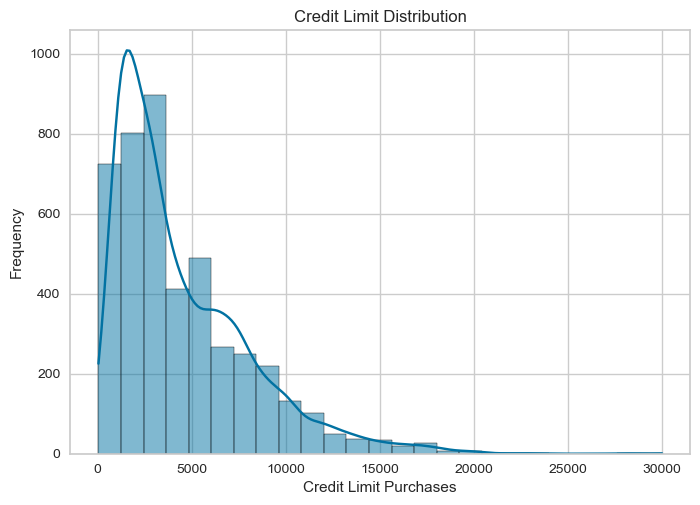

In [7]:
#Visualize Histoplot
sns.histplot(df['CREDIT_LIMIT'], bins=25, kde=True)
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit Purchases')
plt.ylabel('Frequency')
plt.show()

The graph shows that the credit card limit ranges from 0 to 20000 and peaks at 2500.

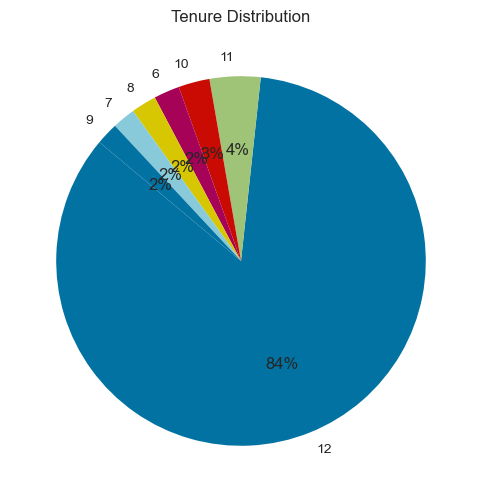

In [8]:
#Visualize Pie Chart
Tenure_counts = df['TENURE'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(Tenure_counts, labels=Tenure_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Tenure Distribution')
plt.show()

The graph shows that the tenure for the credit card holders ranges from 6 to 12 months and are mostly 12 months with 84%.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


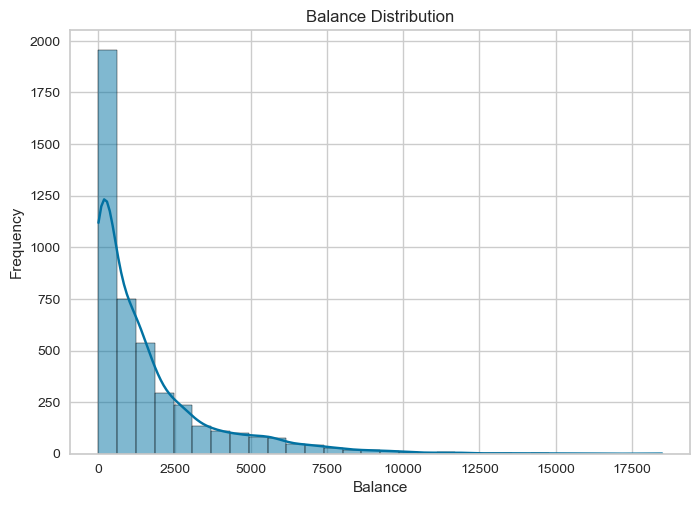

In [9]:
#Visualize Histoplot
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

The graph shows that the balance distribution ranges from 0 onto over 17500 and peaks at a little over 0.

# D. Feature Engineering

### Missing Value Handling

In [10]:
# Erase empty values
df = df.dropna()

In [11]:
#See if empty
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

The missing values are dropped, because missing value are only a little part of the data. Which means 155 missing value out of 4475 entries will not affect the data much.

### Outlier Handling

In [12]:
#Selecting categorical and numerical values
cat_val = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_val = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Show column values
print('Categories: ', cat_val)
print('Numerical: ', num_val)

Categories:  []
Numerical:  ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


All of the columns are considered as numerical values. Even if some are encoded categorical values.

In [13]:
#Creating rows and columns for normal distribution
rows_normal = []
column_normal = []

#Creating rows and columns for skewed distribution
rows_skewed = []
column_skewed = []

#Looping numerical values to filter data distribution
for num in num_val:
    skewness = df[num].skew()

    #Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        rows_normal.append([num, skewness])
    
    #Negative Skew
    elif skewness < -1:
        column_skewed.append(num)
        rows_skewed.append([num, skewness, 'High'])

    #Positive Skew
    elif skewness > 1:
        column_skewed.append(num)
        rows_skewed.append([num, skewness, 'High'])

    #Moderate negative Skew
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        rows_skewed.append([num, skewness, 'Low'])

    #Moderate positive Skew
    elif skewness >= -0.5 and skewness < 1:
        column_skewed.append(num)
        rows_skewed.append([num, skewness, 'Low'])    

In [14]:
#Show normal distribution
pd.DataFrame(data=rows_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,CUST_ID,-0.000910
1,PURCHASES_FREQUENCY,0.030477
2,PURCHASES_INSTALLMENTS_FREQUENCY,0.489101


These columns are considered as normallyy distributed columns, though all are actually categorical columns.

In [15]:
#Show skewed distribution
pd.DataFrame(data=rows_skewed, columns=['skew_distribution', 'skewness', 'rate'])

,skew_distribution,skewness,rate
0,BALANCE,2.306056,High
1,BALANCE_FREQUENCY,-2.085656,High
2,PURCHASES,6.982698,High
3,ONEOFF_PURCHASES,9.827307,High
4,INSTALLMENTS_PURCHASES,6.252820,High
5,CASH_ADVANCE,5.611537,High
6,ONEOFF_PURCHASES_FREQUENCY,1.514243,High
7,CASH_ADVANCE_FREQUENCY,1.802858,High
8,CASH_ADVANCE_TRX,6.352409,High
9,PURCHASES_TRX,4.694067,High


The rest of the columns are considered as highly skewed, even if some are encoded categorical values.

In [16]:
#Capping method for normal distribution
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

#Fit & Transforming X_train
df_capped = winsorizer_normal.fit_transform(df)

In [17]:
#Capping method for skewed distribution
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed,)

#Fit & Transforming X_train
df_capped = winsorizer_normal.fit_transform(df)


Outliers are handled based on their skewness. The normally distributed columns are handled with the gaussian capping method. Meanwhile, the skewed columns are handled with iqr capping method.

In [18]:
# Plot Distribution Comparison
def outlier_handling_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

The graph and chart are made to see how different the data are before and after outlier handling.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


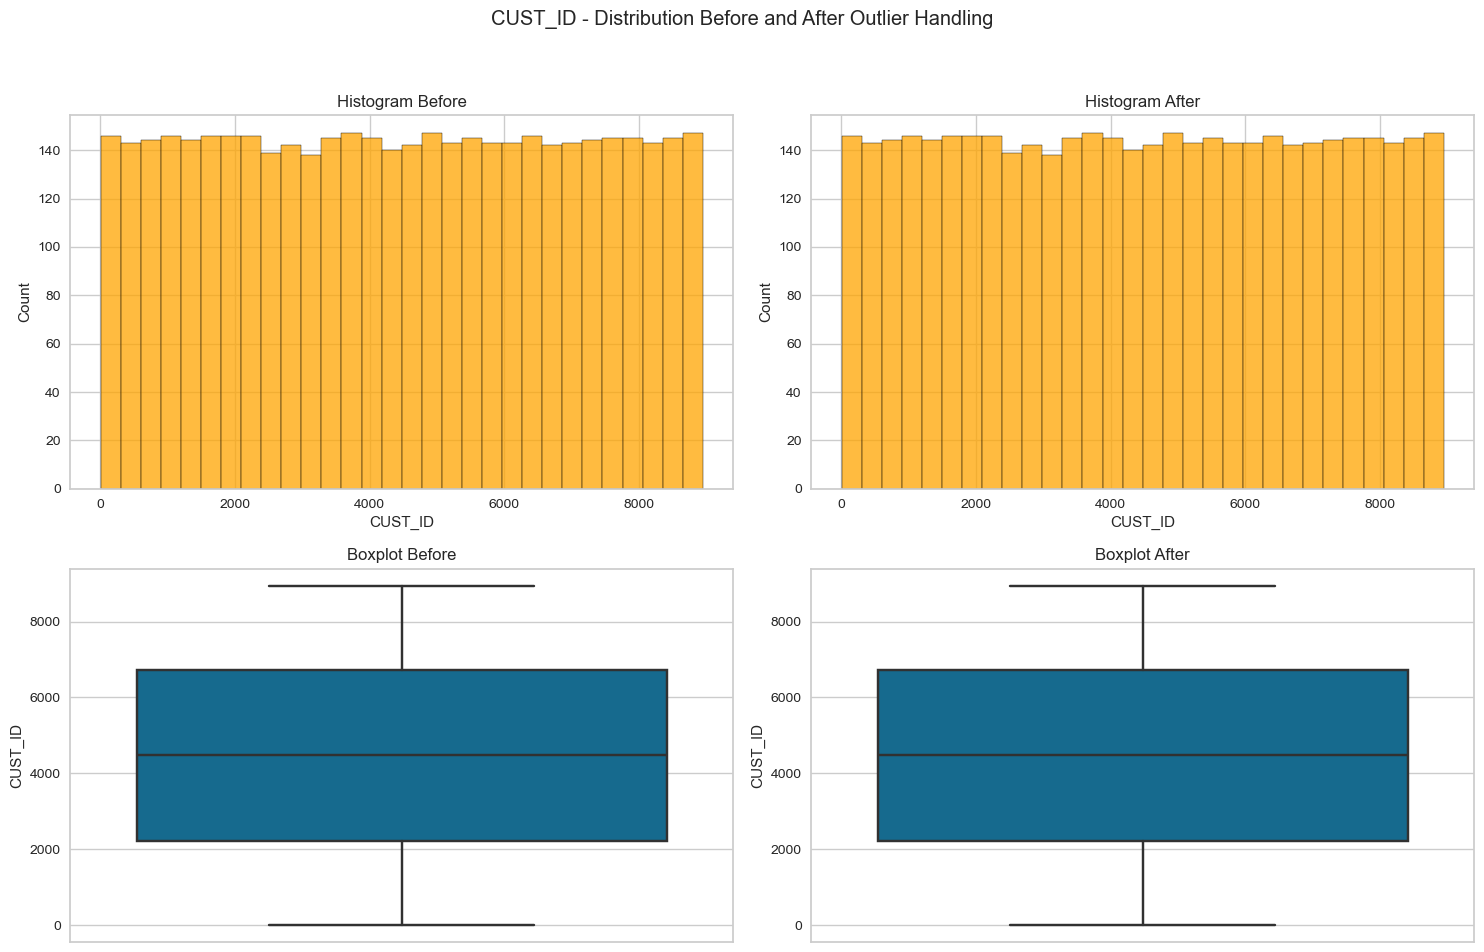

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


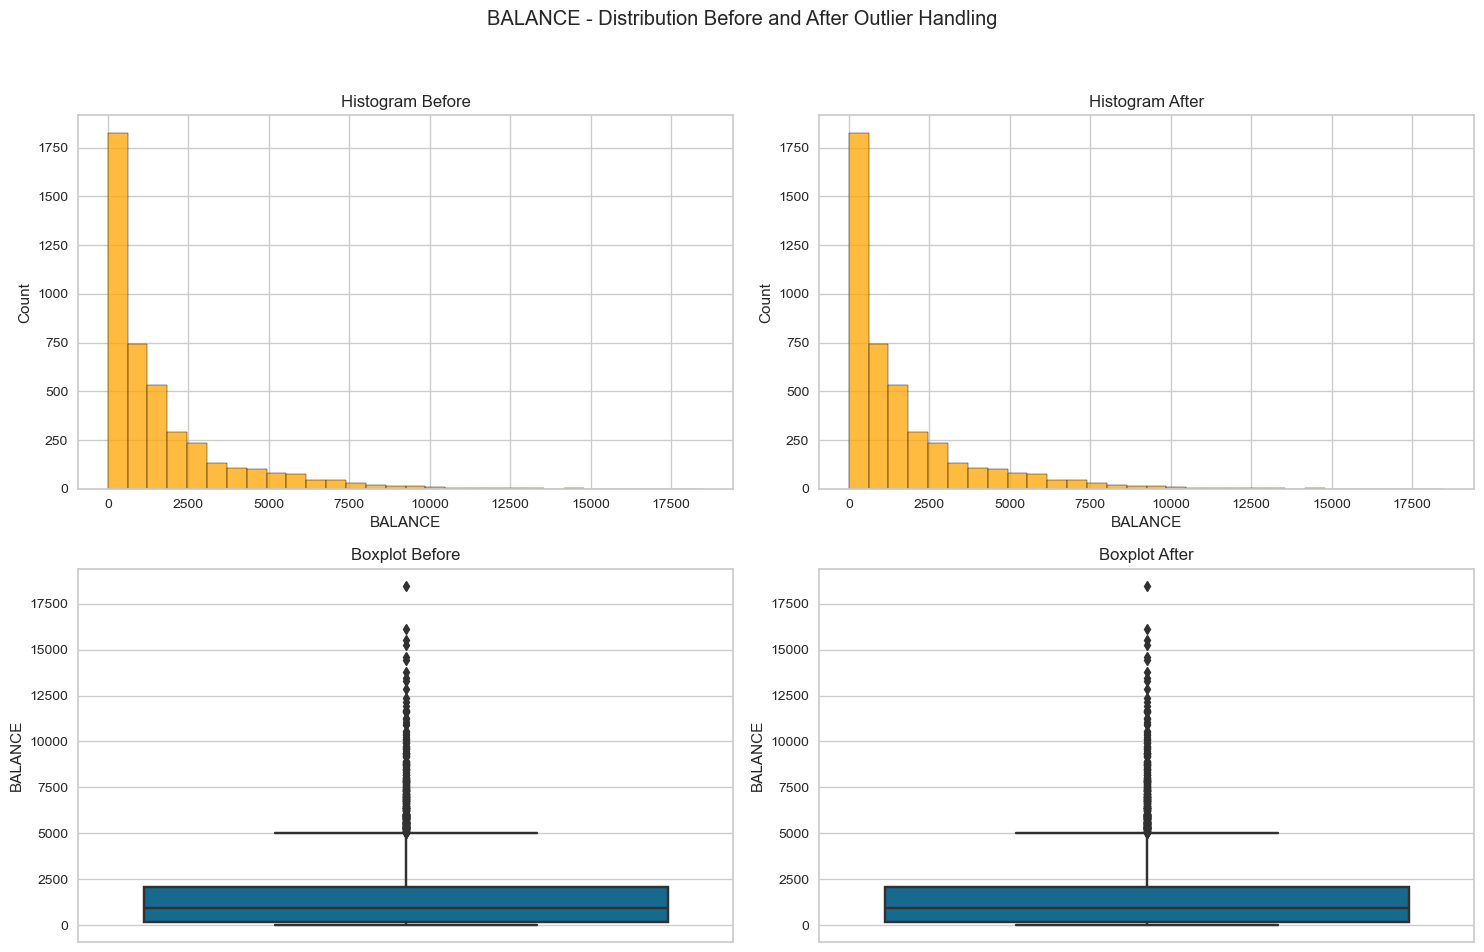

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


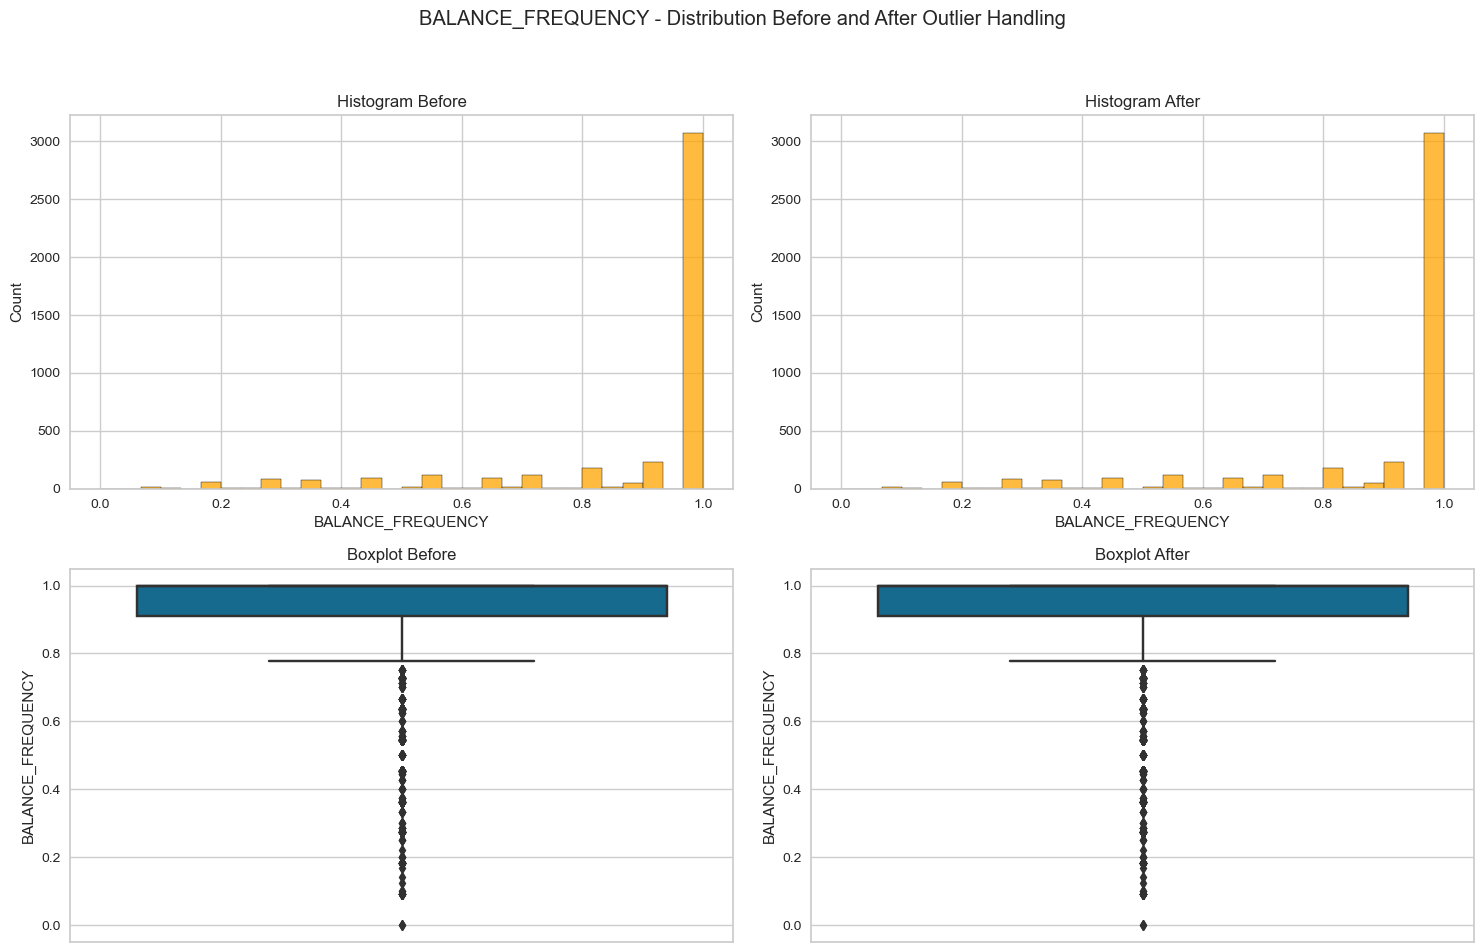

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


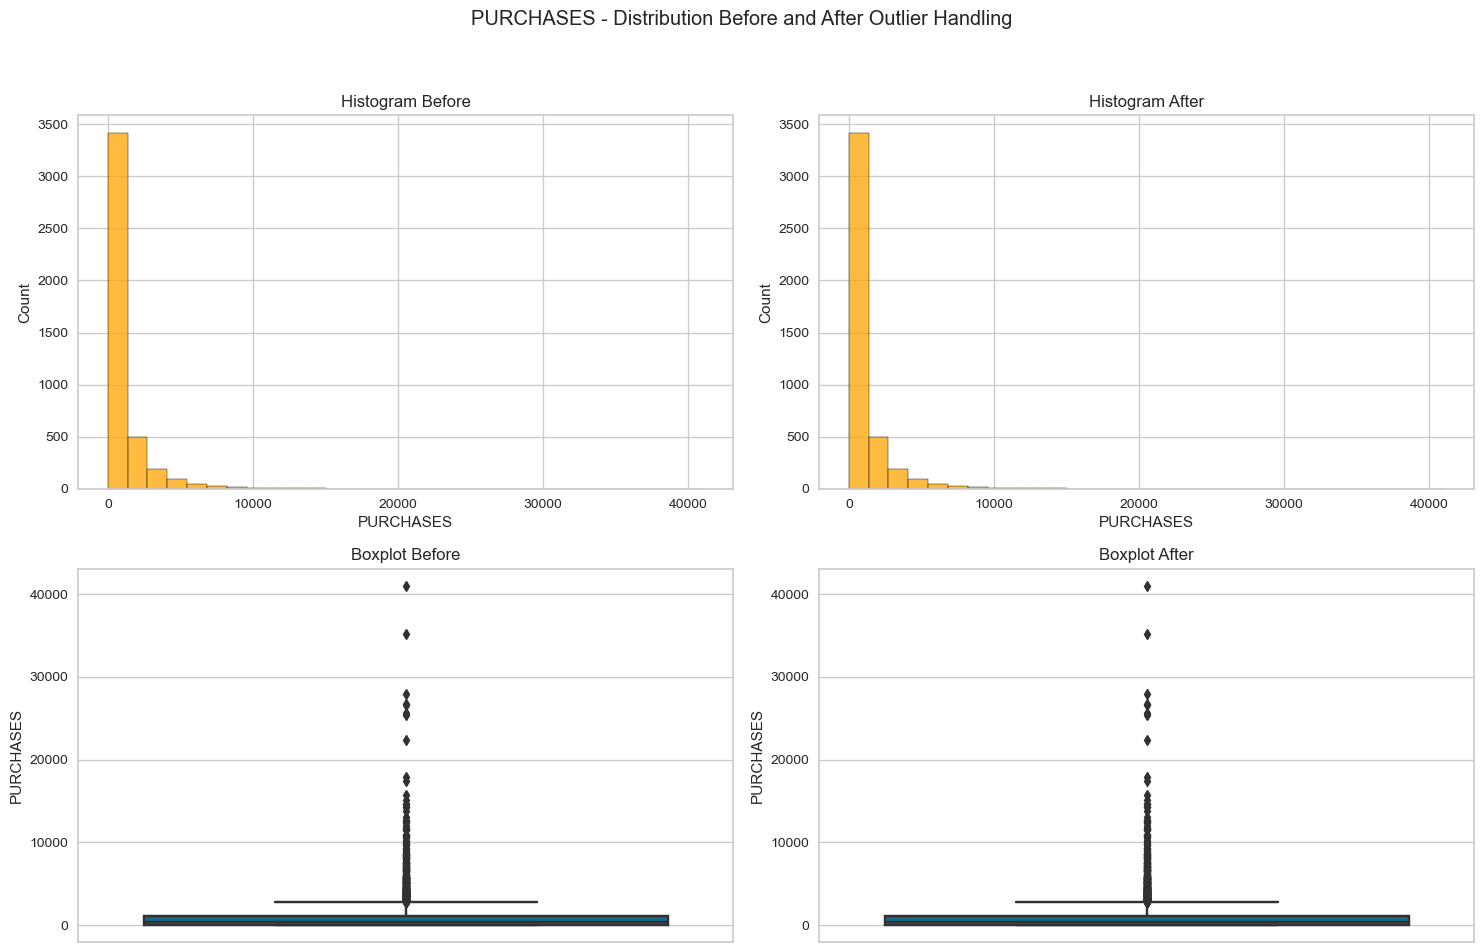

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


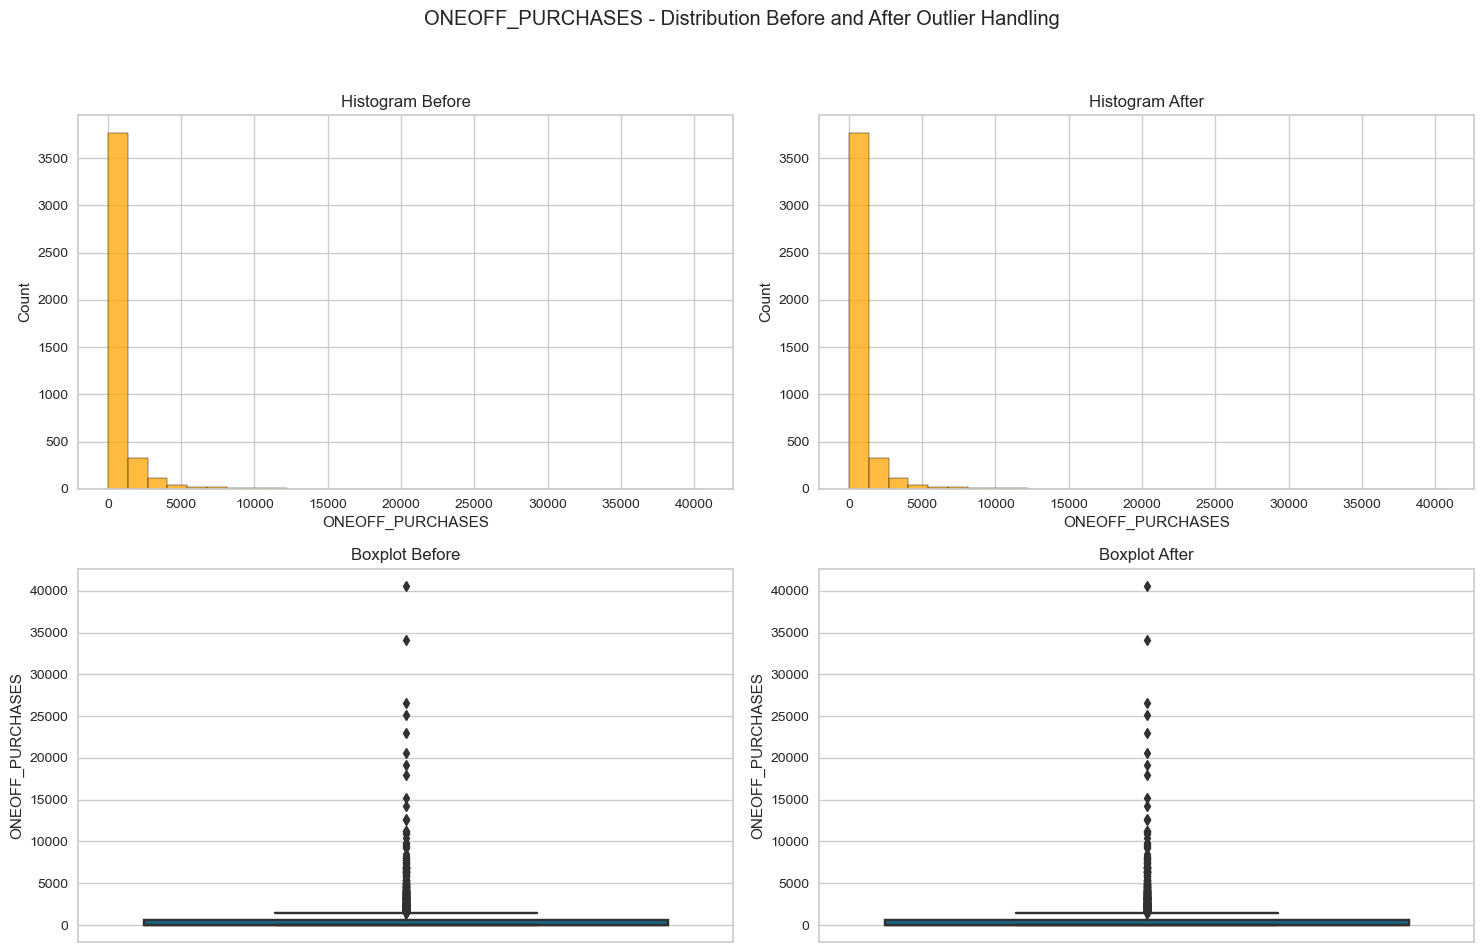

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


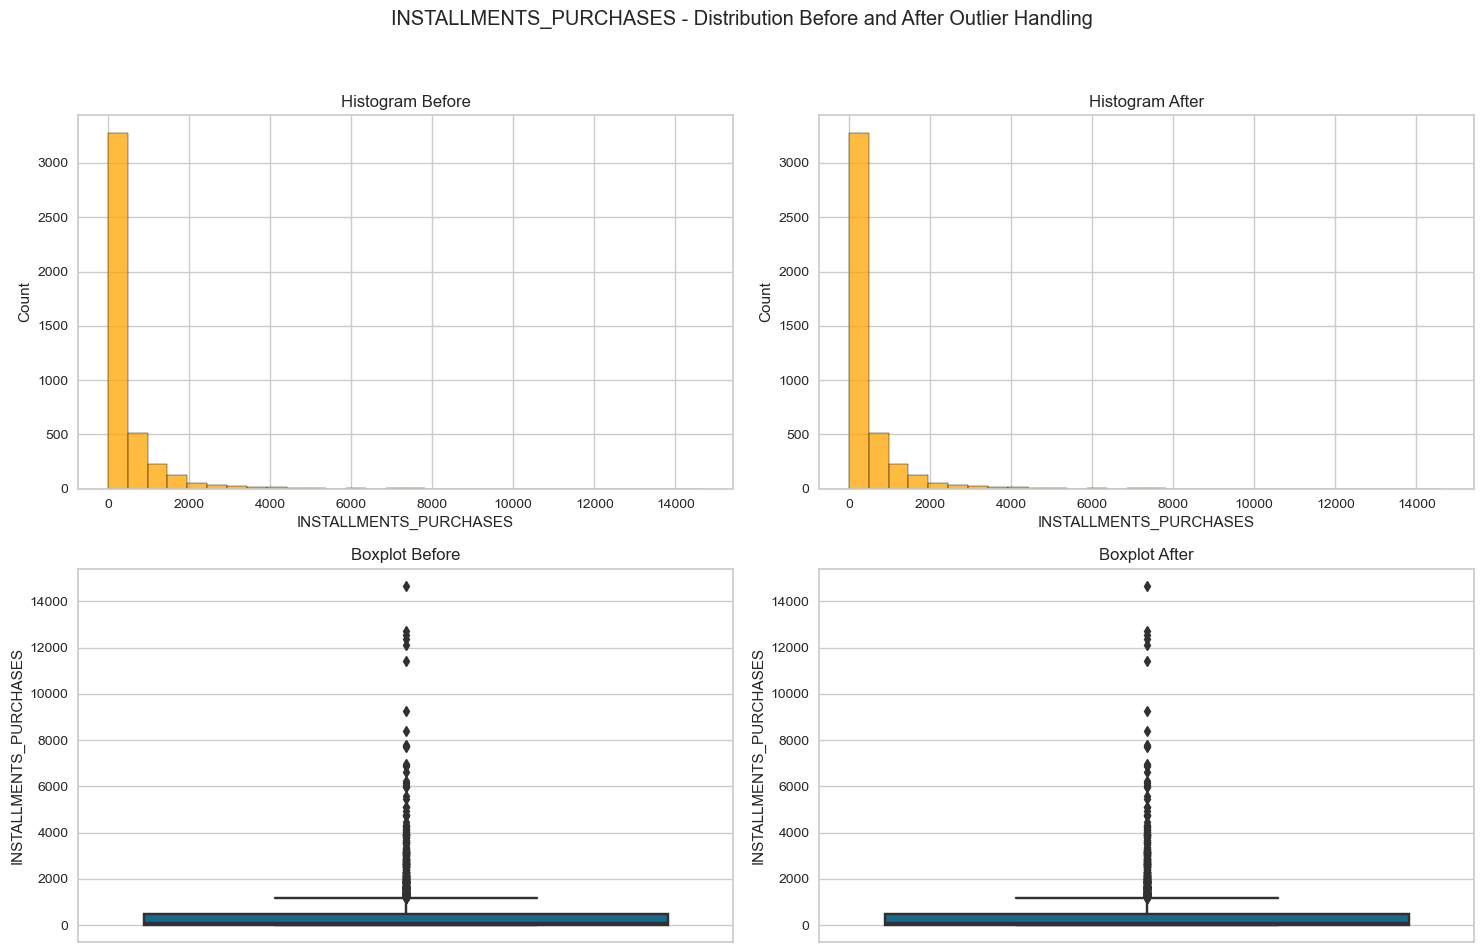

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


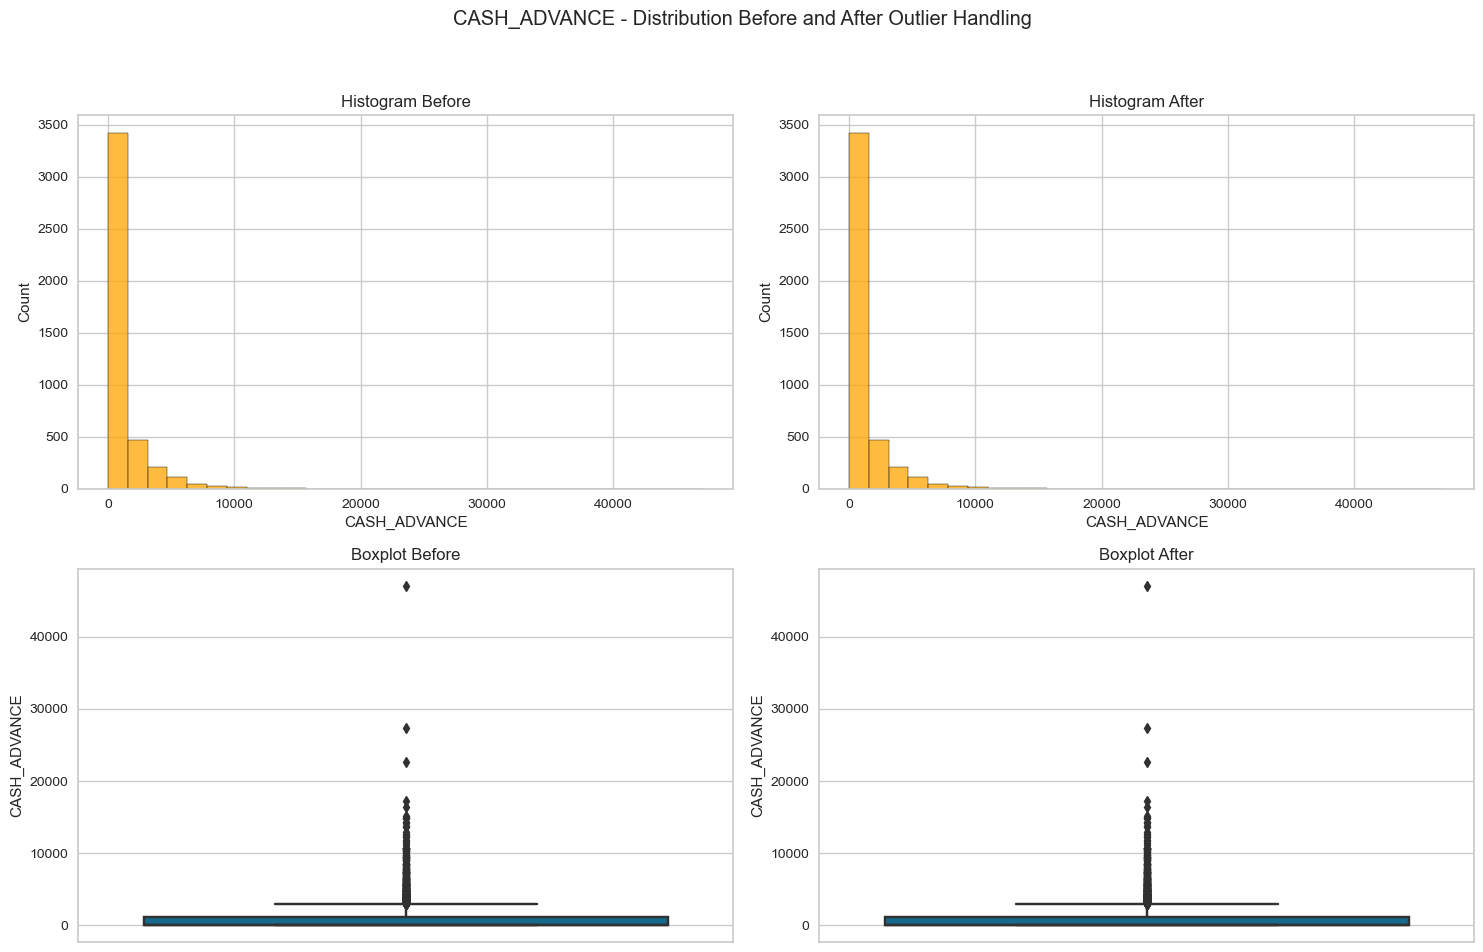

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


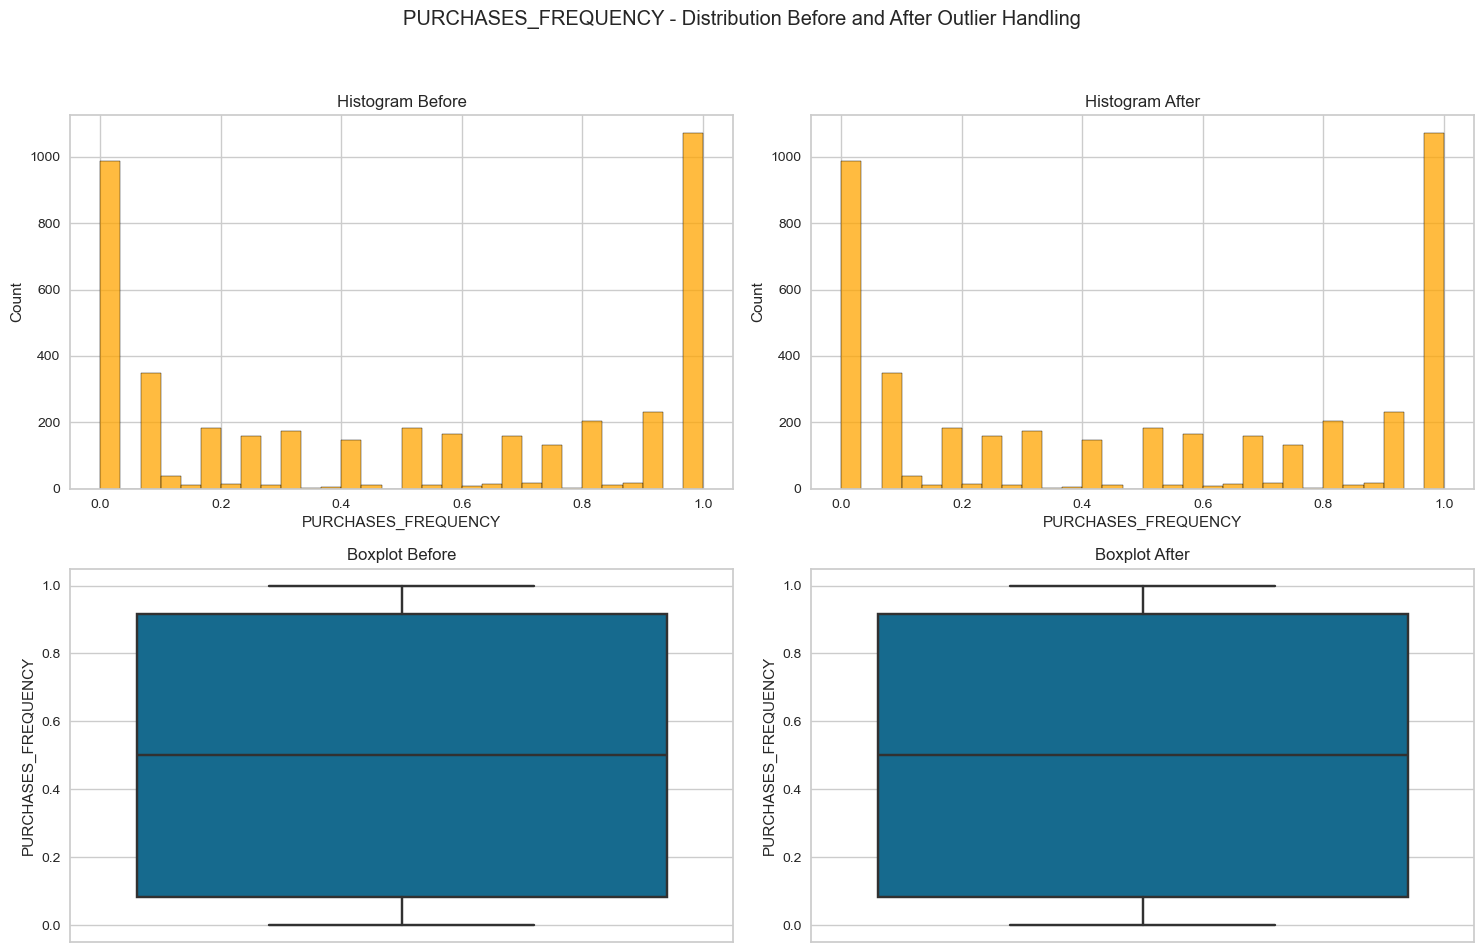

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


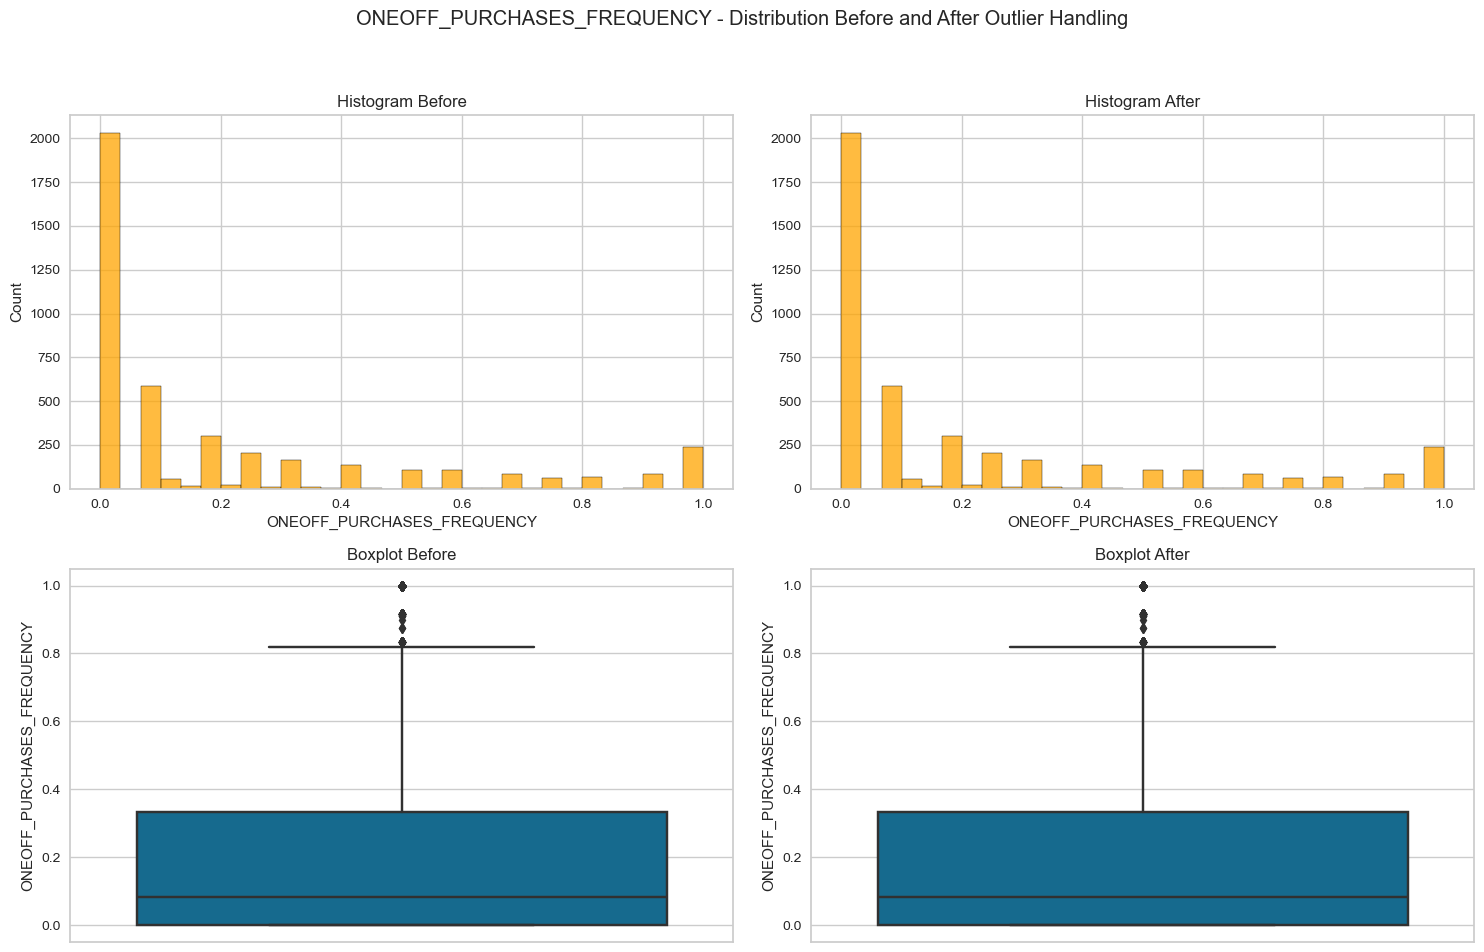

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


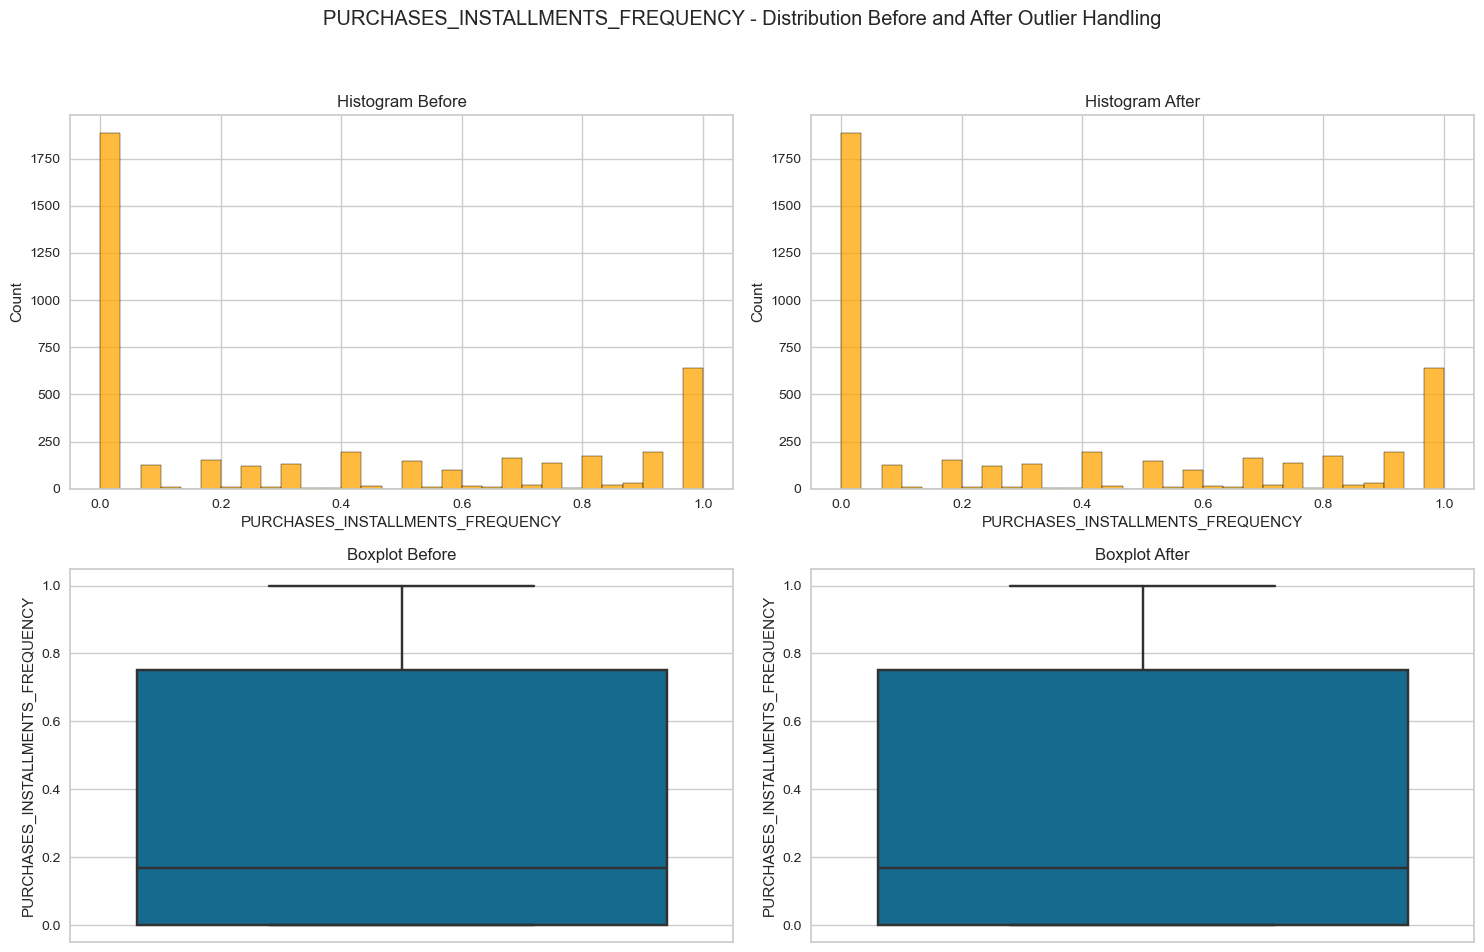

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


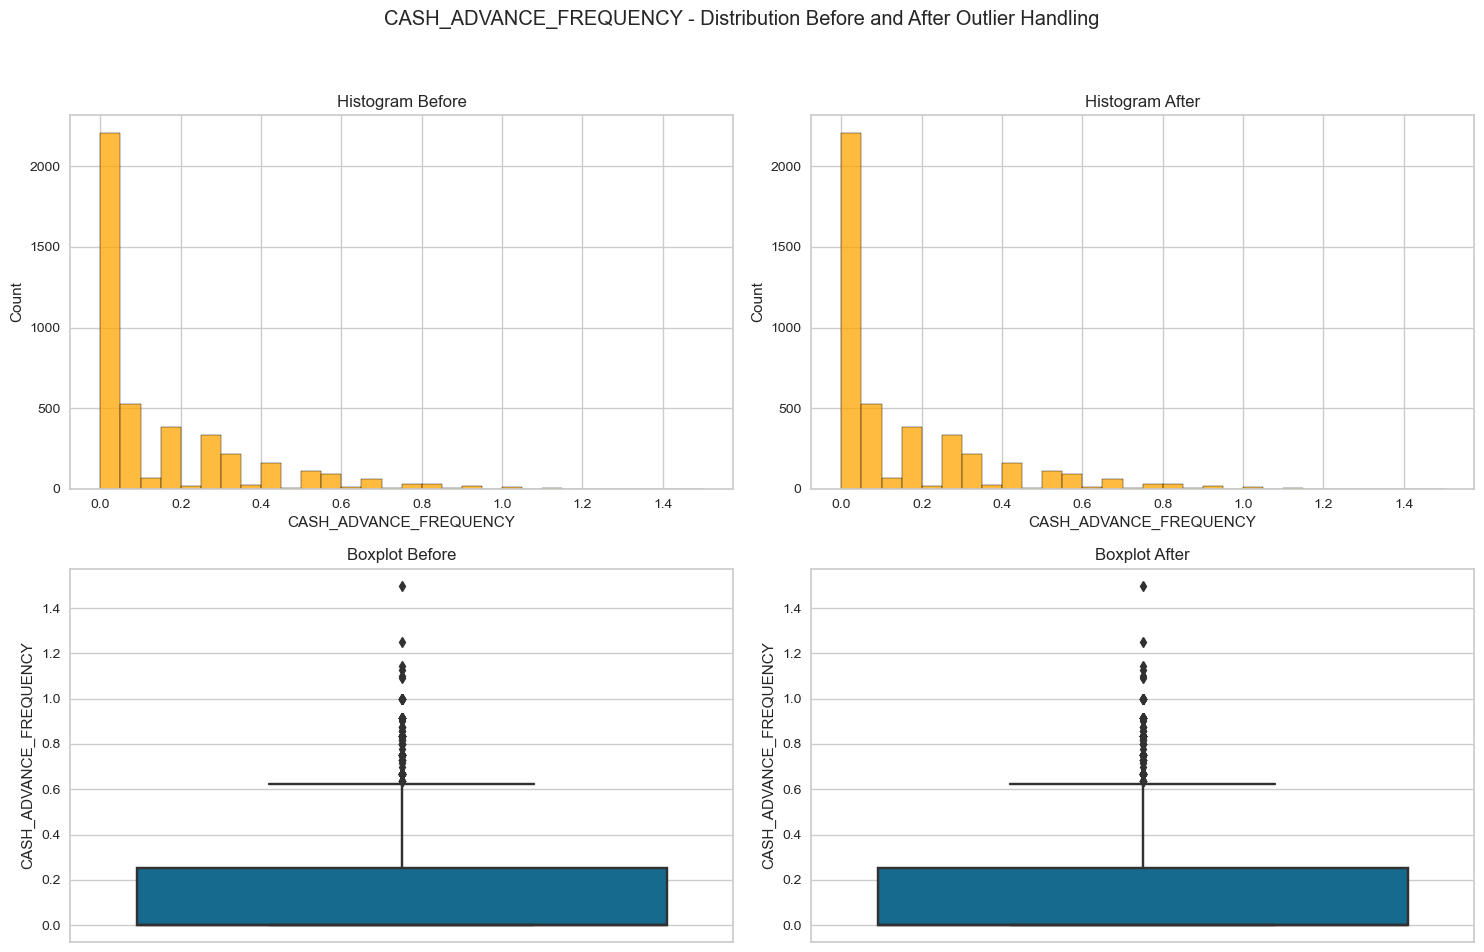

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


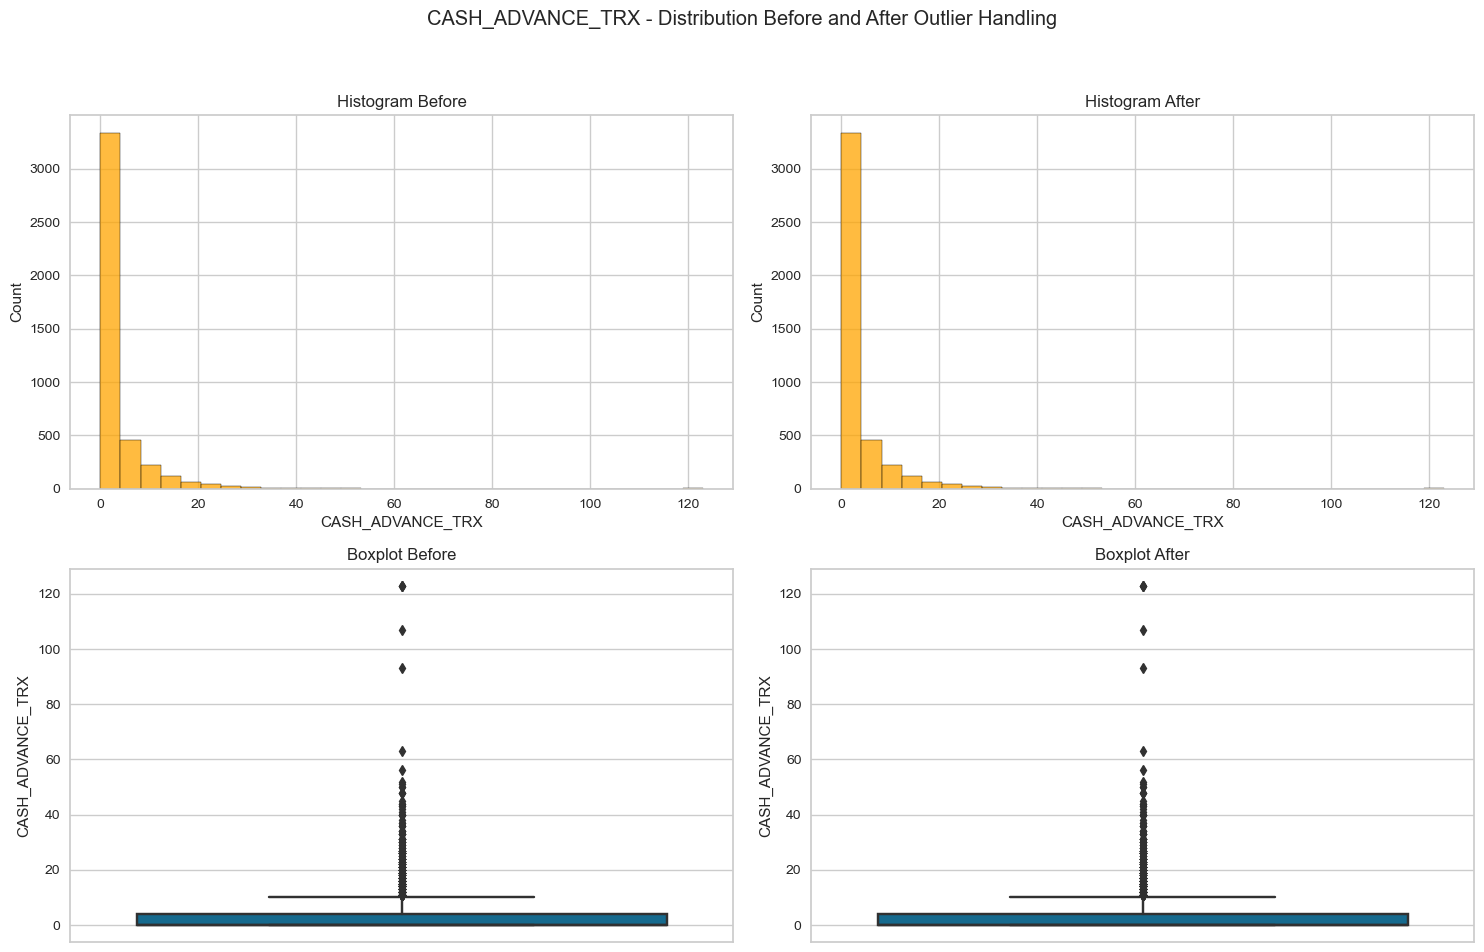

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


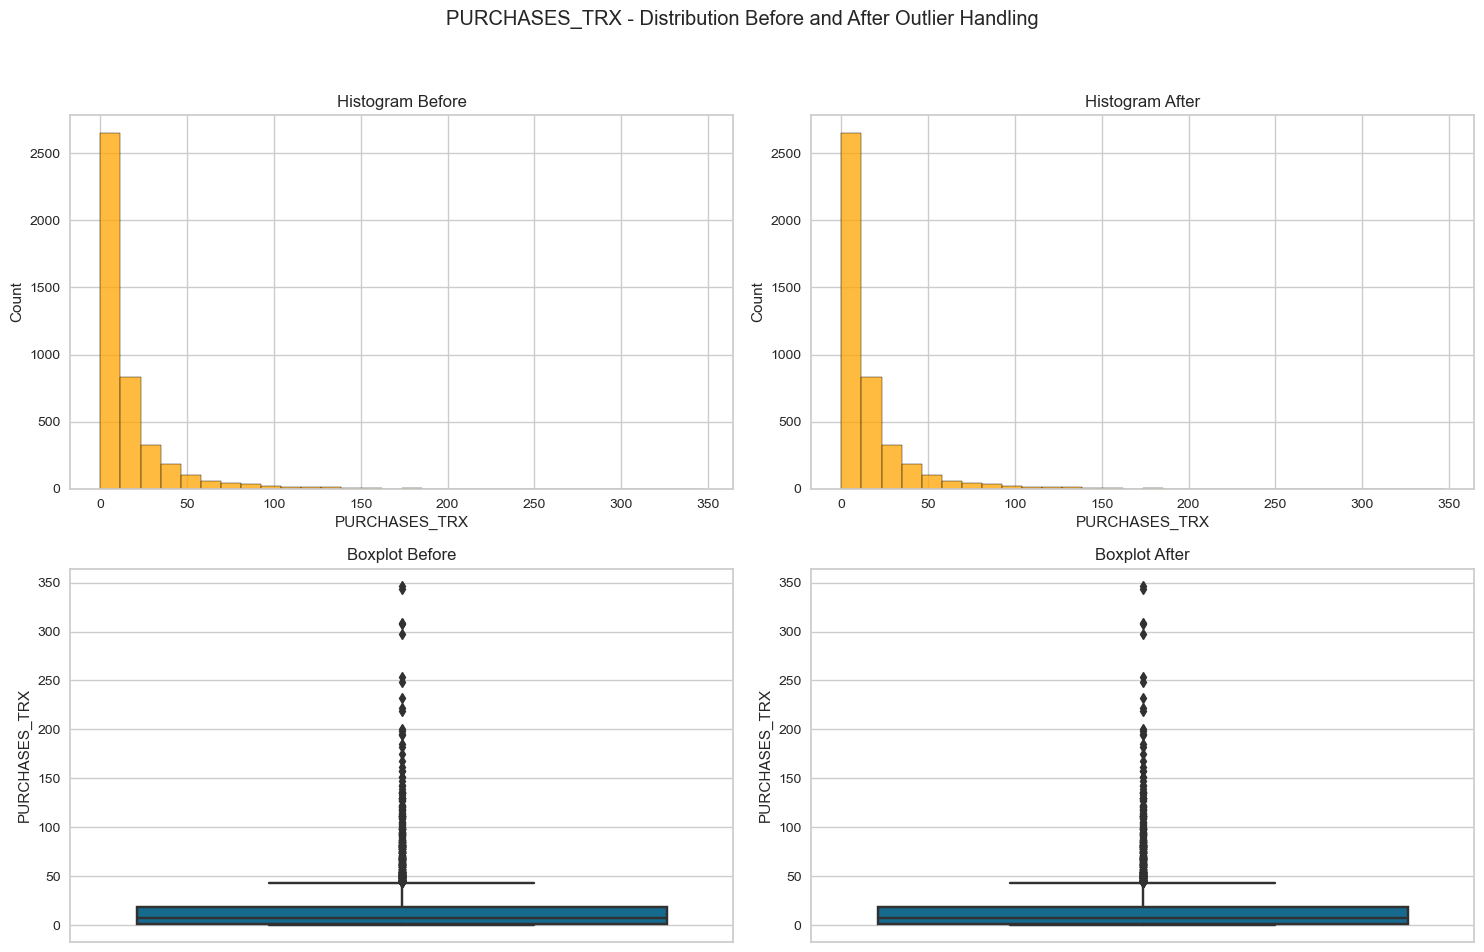

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


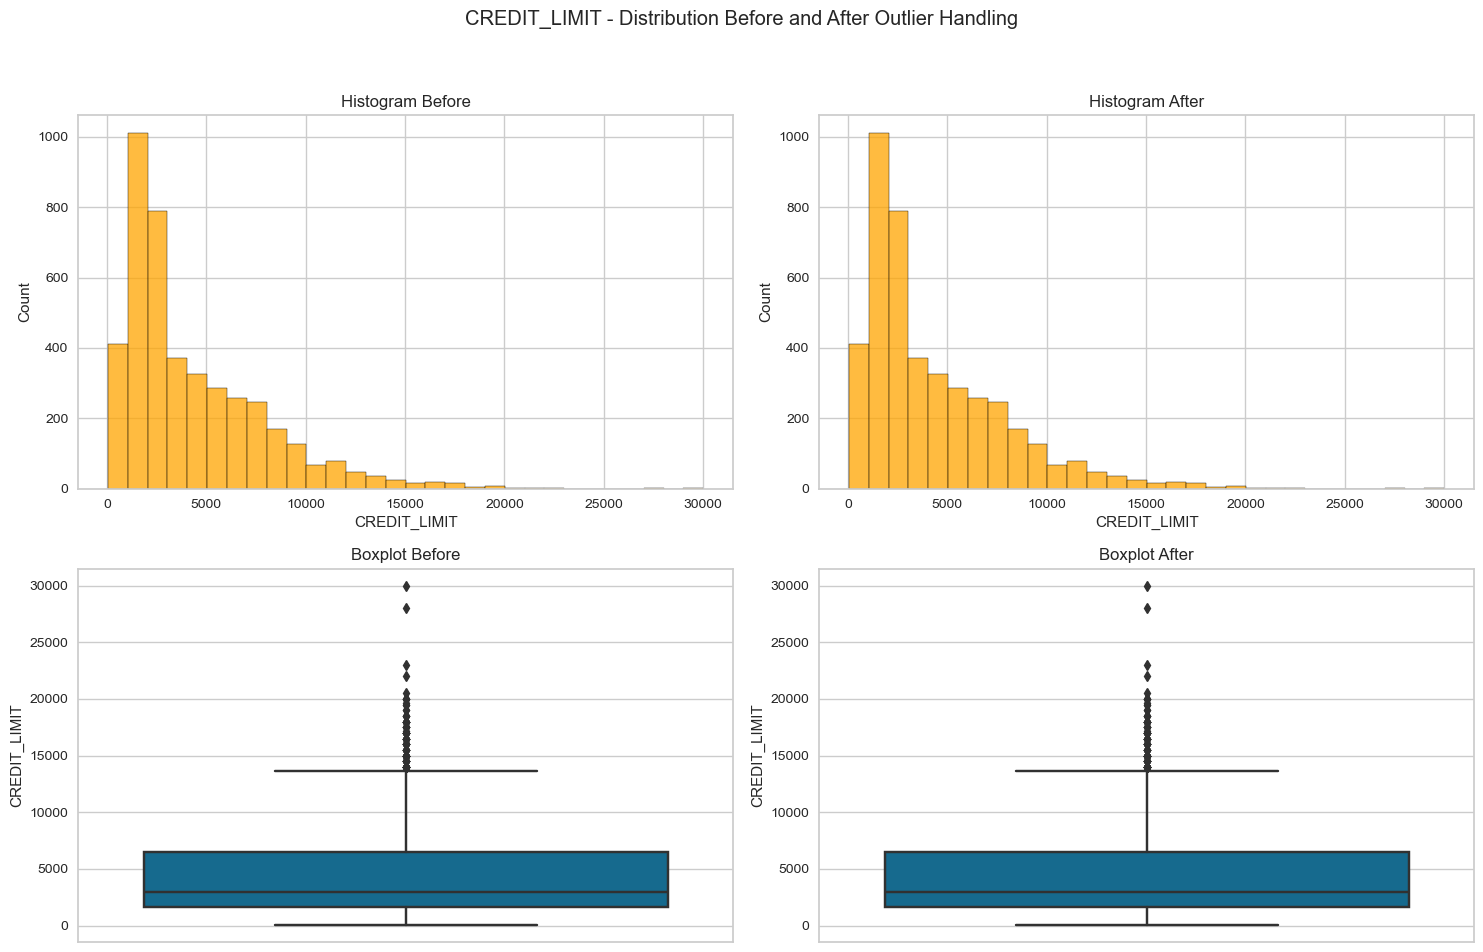

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


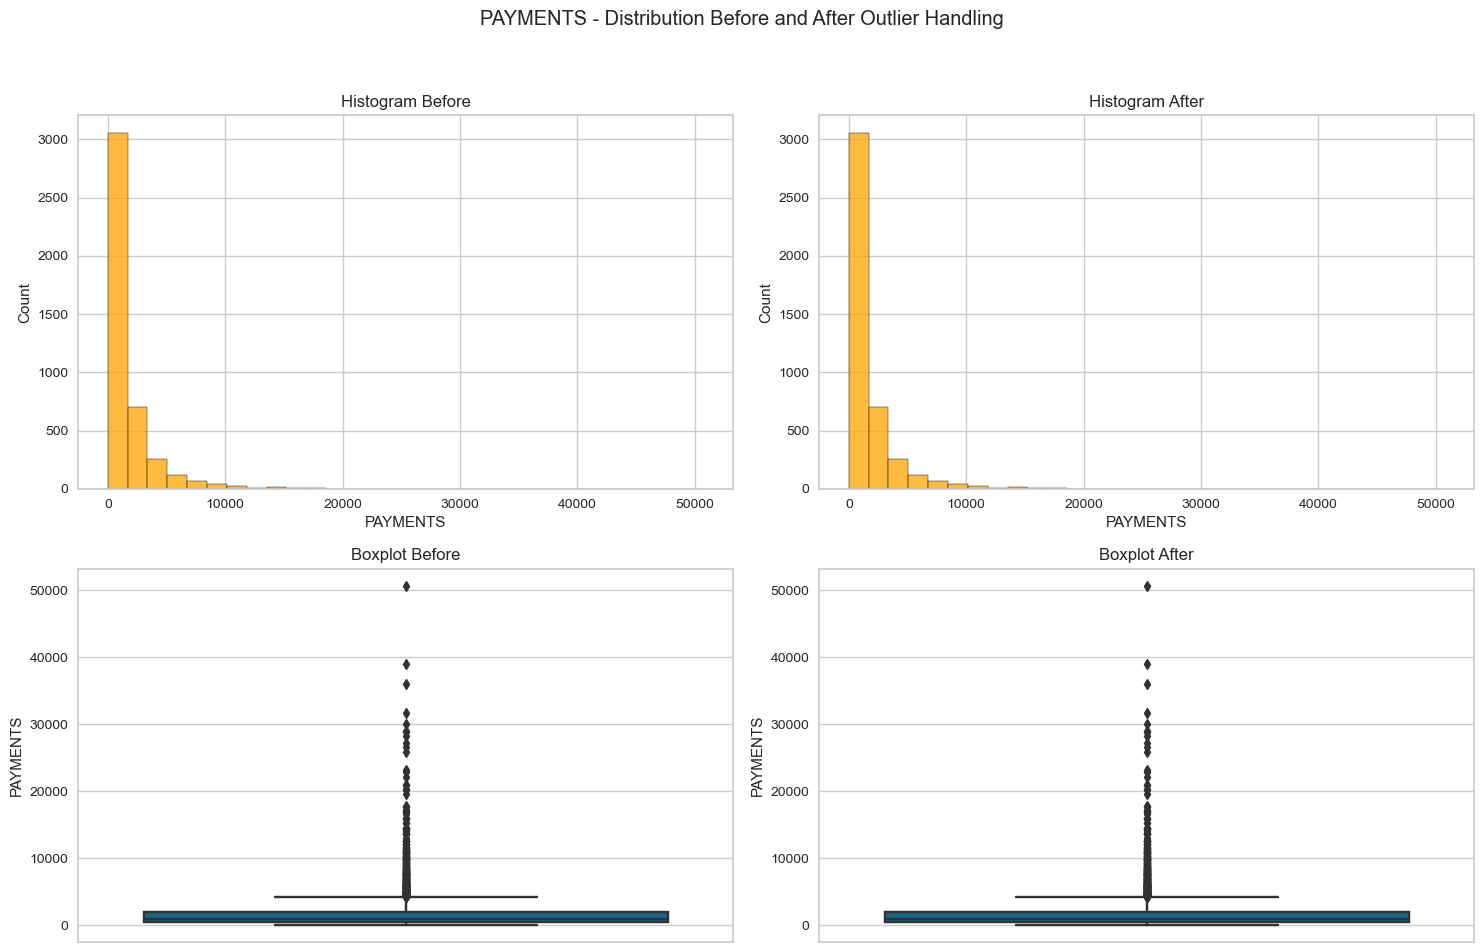

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


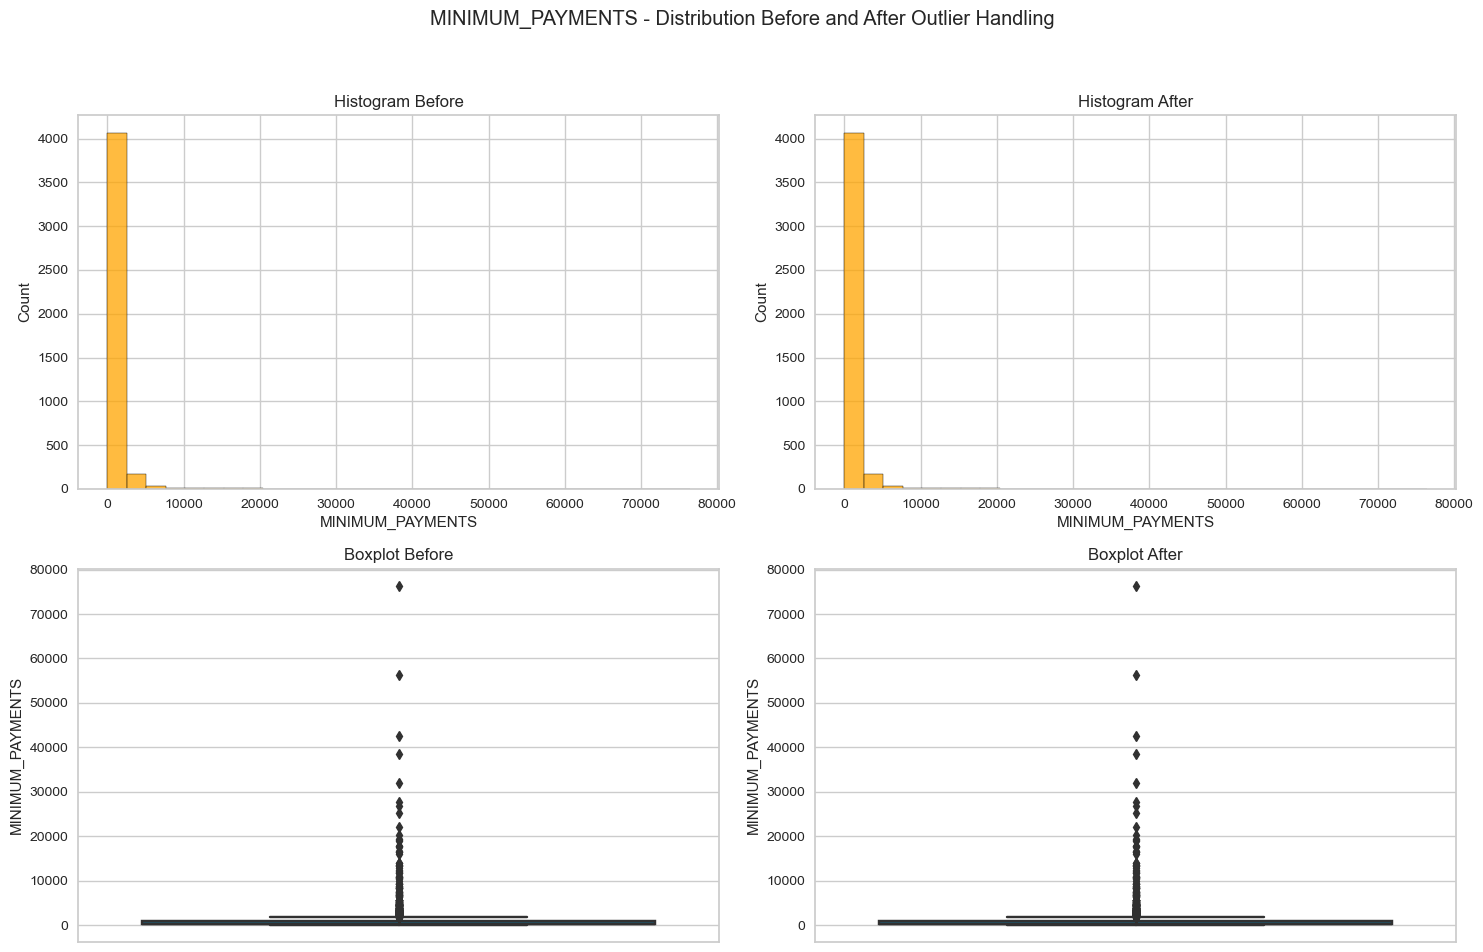

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


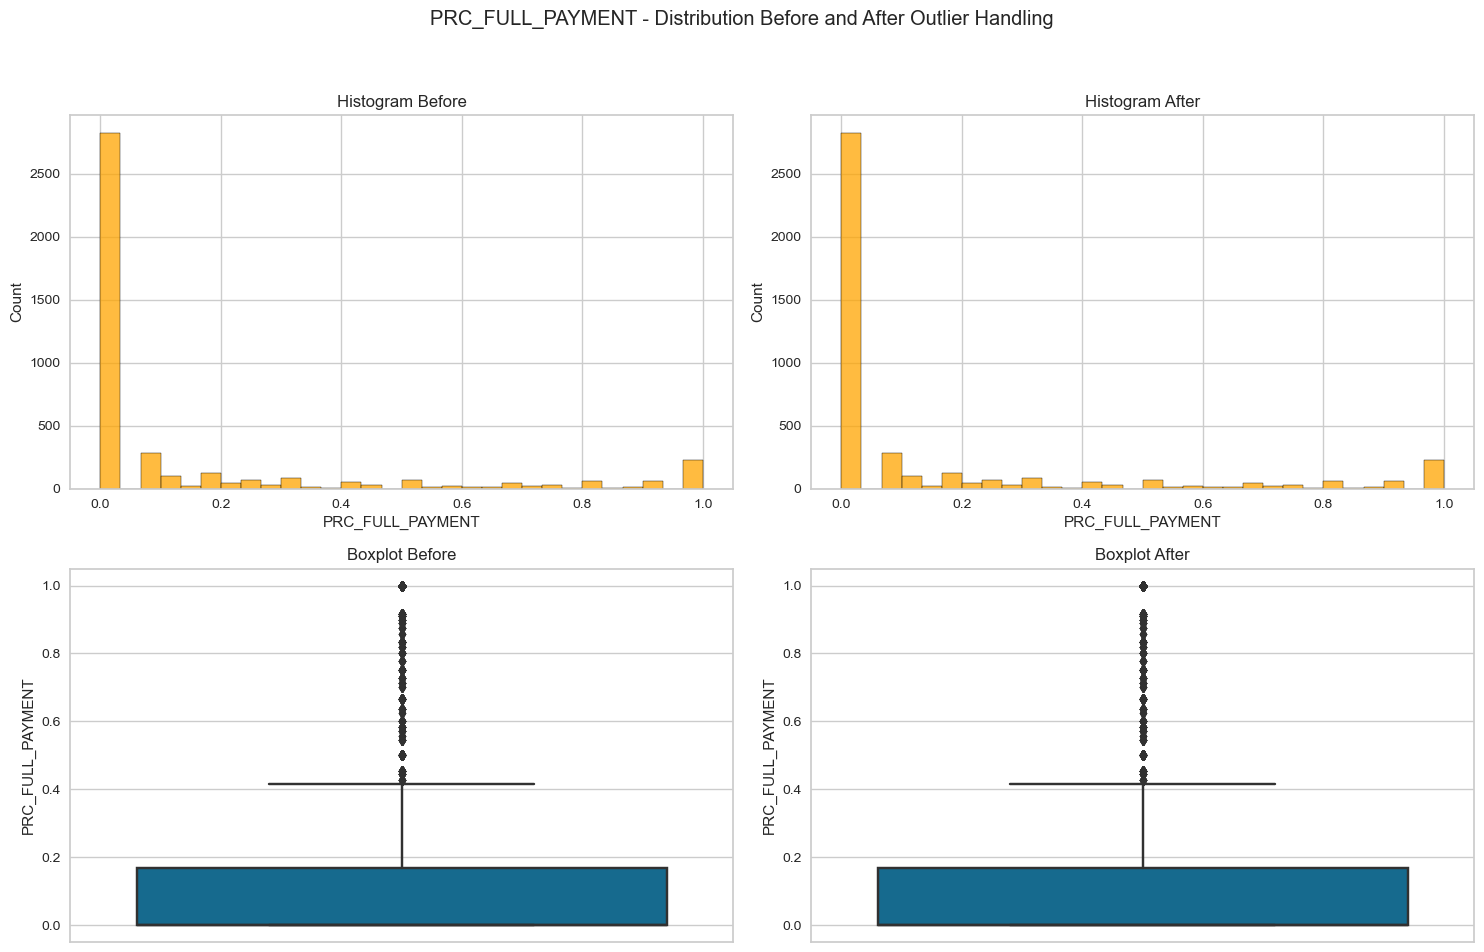

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


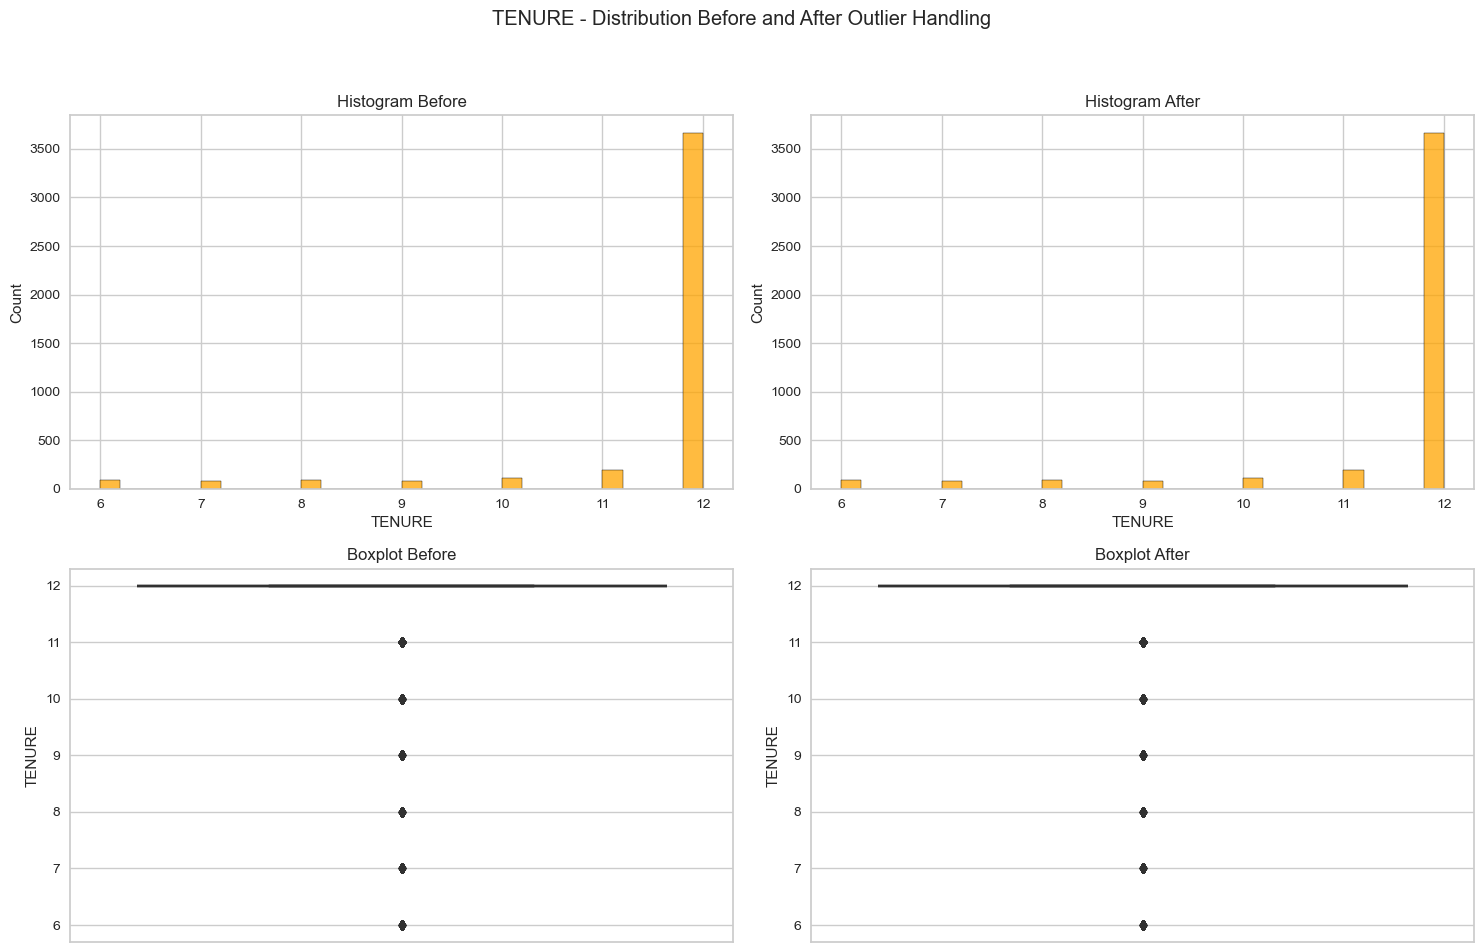

In [19]:
for num in num_val:
    outlier_handling_comparison(df, df_capped, num)

The data before and after handling outliers doesn't look too different.

### Scaling

In [20]:
#Creating a copy of data
ds = df_capped.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

Dropped all the columns that are not true numerical columns (encoded categorical columns). Which then will be scaled for an easier read.

# E. Clustering

In [21]:
pca = PCA()
pca.fit(scaled_ds)

PCA()

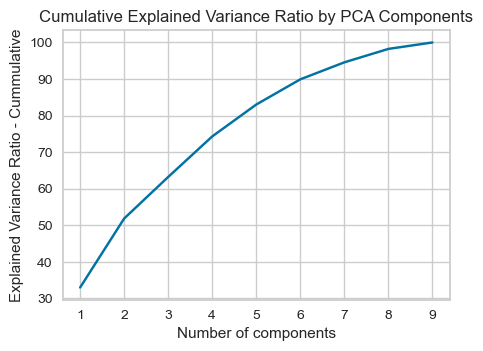

In [22]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=[5, 3.5])
plt.grid(True)  # Ensures the grid is turned on
plt.plot(range(1, 10), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xticks(range(1, 10))  # Sets the x-ticks to cover the range of components
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.show()

Based on the graph, we see that if we keep 6 component, we still retain 90% of the information. Therefore we will be keeping 6 components for the model to read. 

In [23]:
#Initiating PCA to reduce dimentions
pca = PCA(n_components=6, random_state=6)
pca.fit(scaled_ds)

ds_pca = pca.transform(scaled_ds)

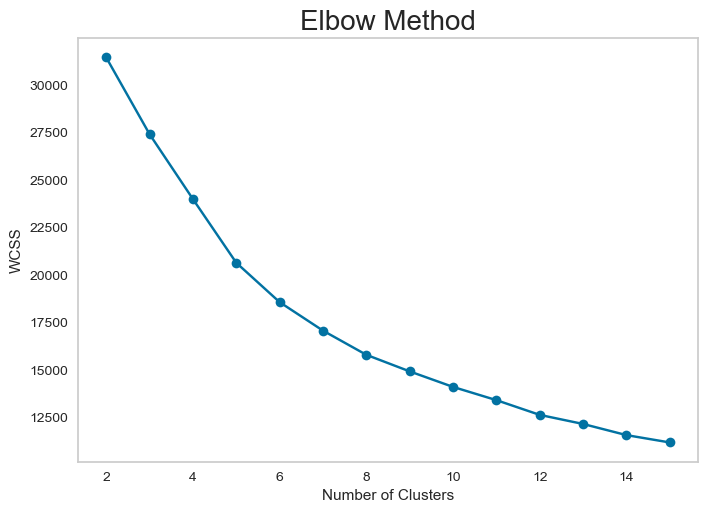

In [24]:
#  Finding number of clusters for K-means
wcss = []
random_state = 6
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(scaled_ds)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the elbow method, the number of cluster that is ideal is 6. The elbow method shows that there wont be a great differences in the distance between each point and the centroid in a cluster. 

In [25]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.4539504523129883
For n_clusters = 3 The average silhouette_score is : 0.4033500052834573
For n_clusters = 4 The average silhouette_score is : 0.42331682323398745
For n_clusters = 5 The average silhouette_score is : 0.41010068841499064
For n_clusters = 6 The average silhouette_score is : 0.41659493385823193
For n_clusters = 7 The average silhouette_score is : 0.36191989798669383
For n_clusters = 8 The average silhouette_score is : 0.37076092925732435
For n_clusters = 9 The average silhouette_score is : 0.3417294029809045
For n_clusters = 10 The average silhouette_score is : 0.3454392601247496
For n_clusters = 11 The average silhouette_score is : 0.3274625504429508
For n_clusters = 12 The average silhouette_score is : 0.31733737574830495
For n_clusters = 13 The average silhouette_score is : 0.35032848844321113
For n_clusters = 14 The average silhouette_score is : 0.3251955572178896


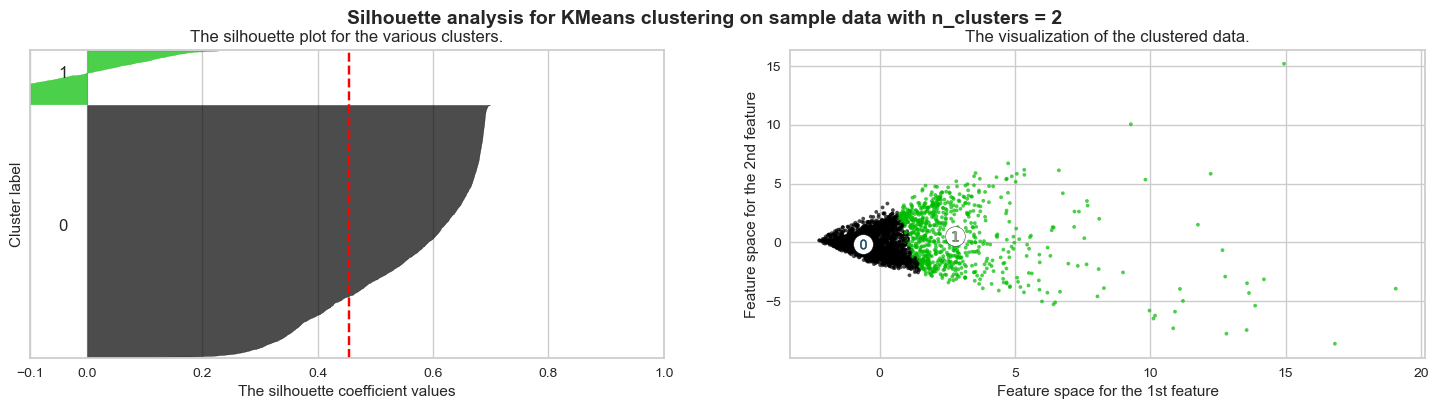

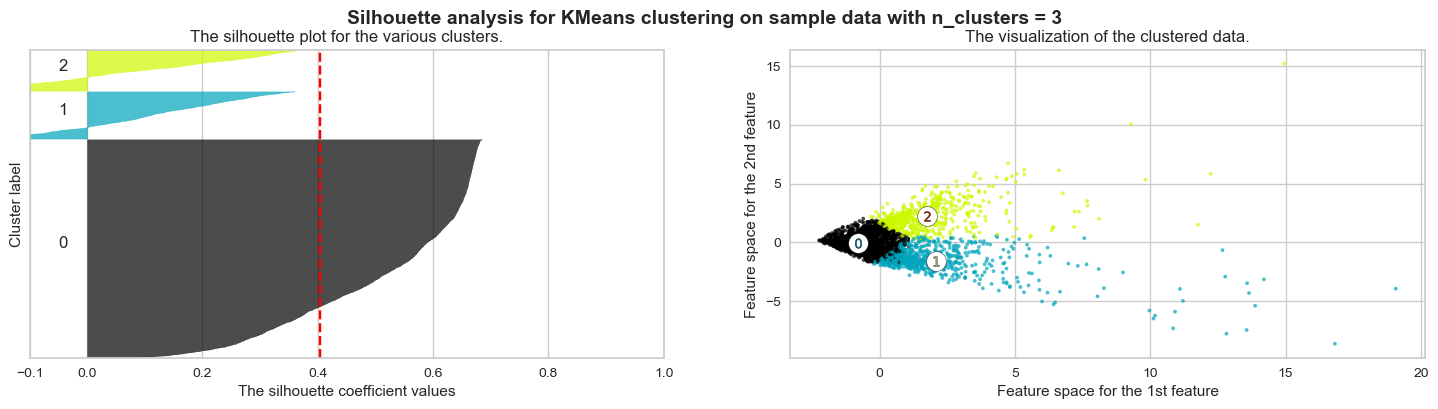

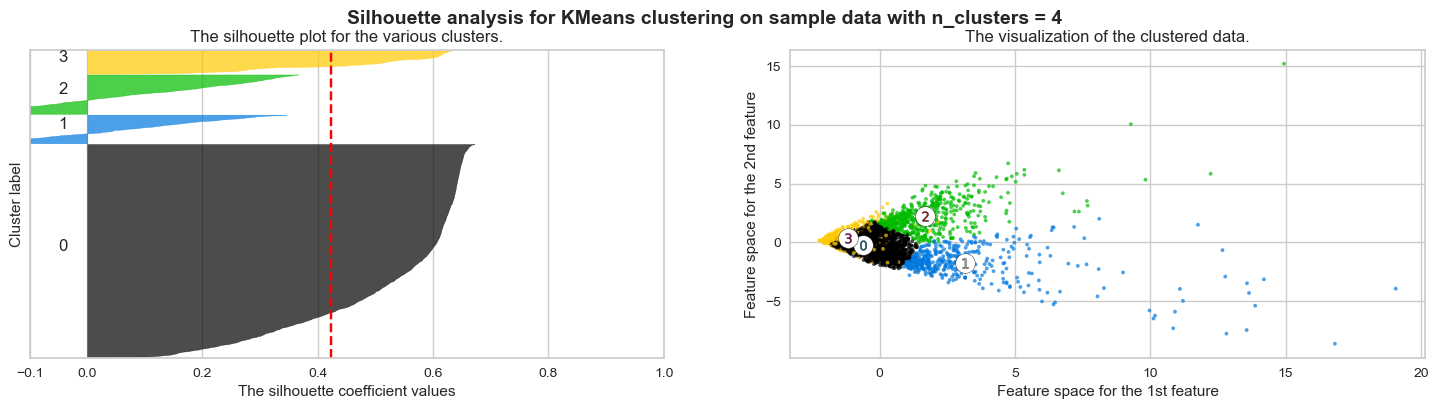

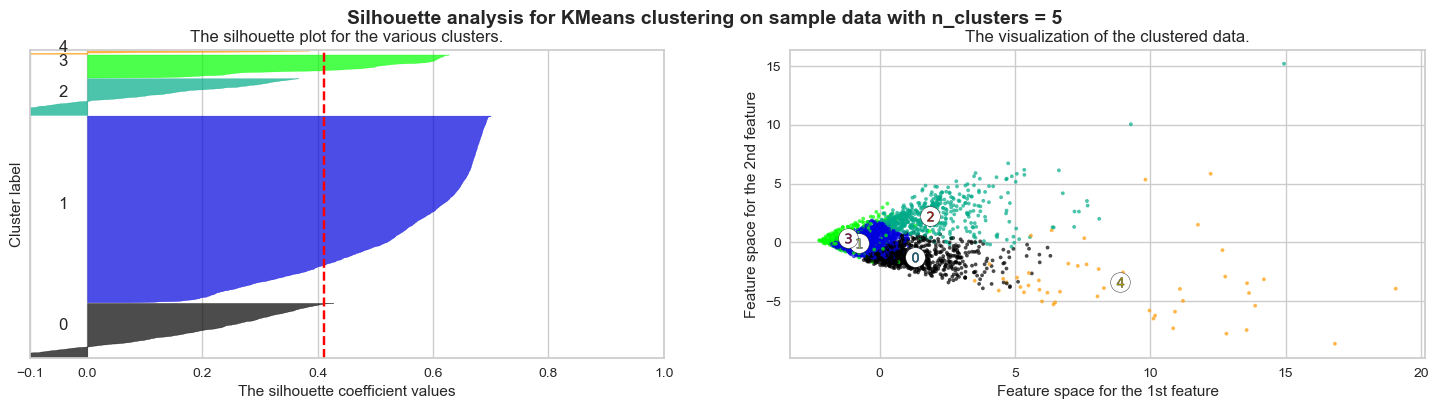

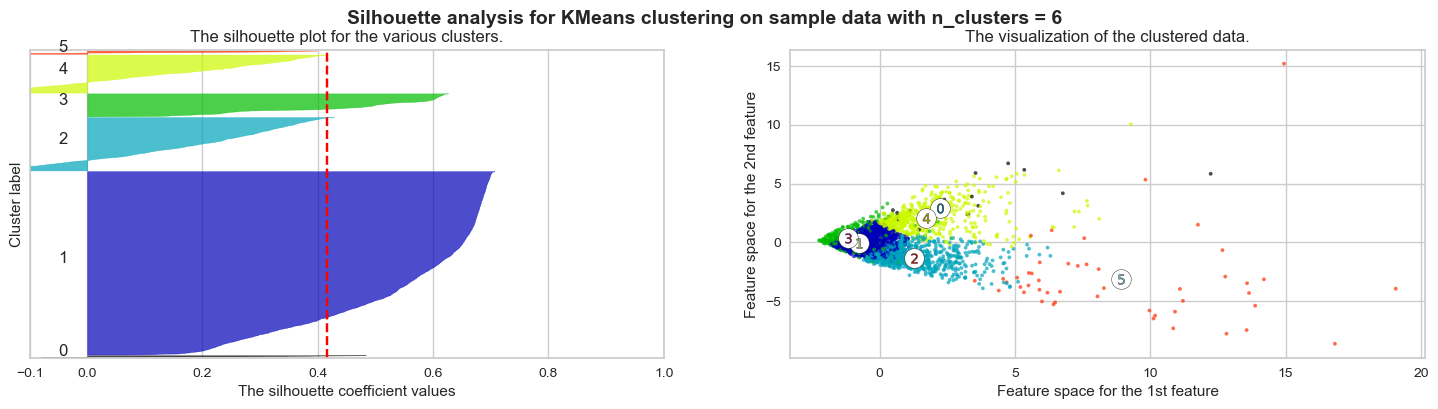

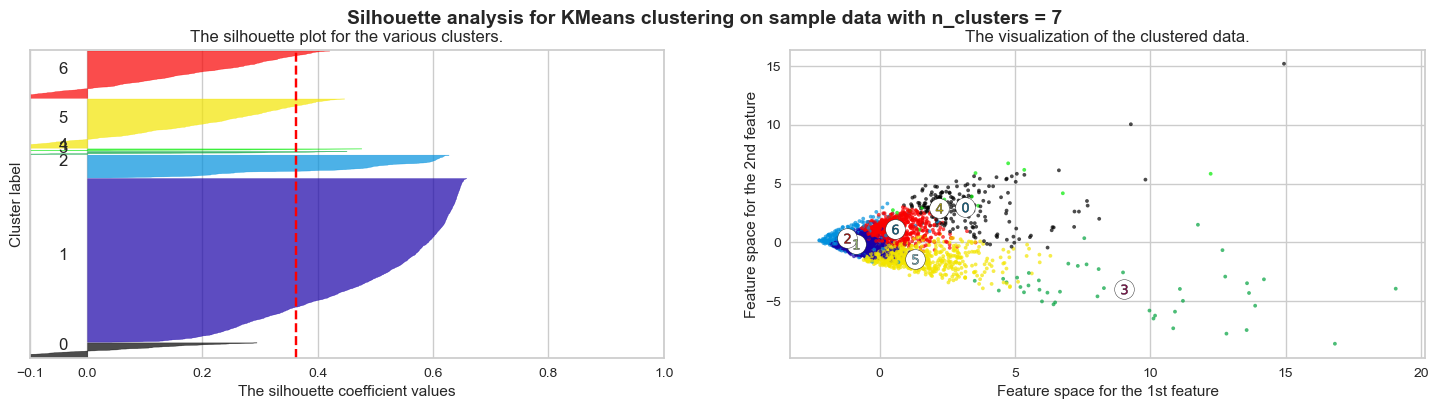

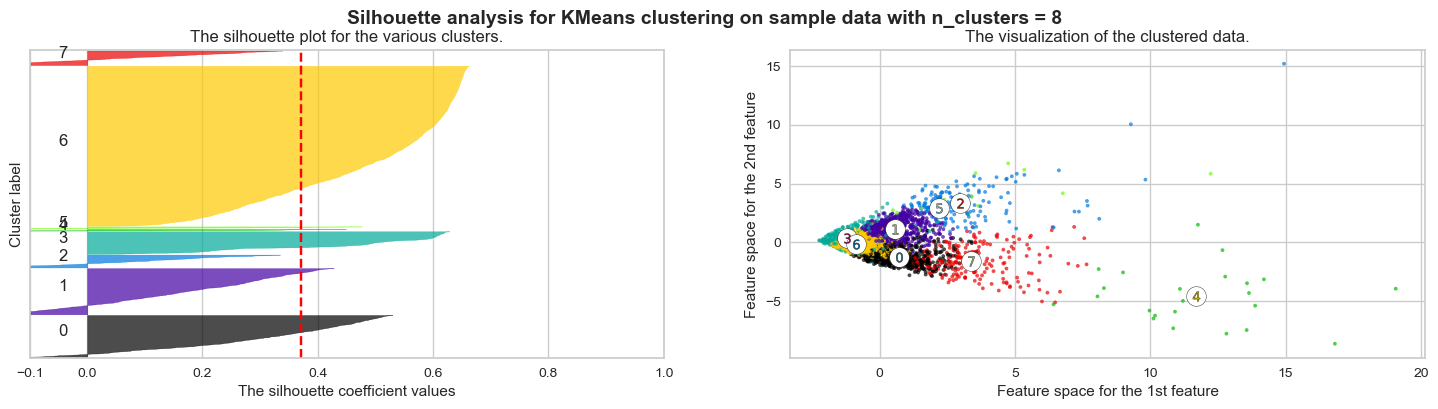

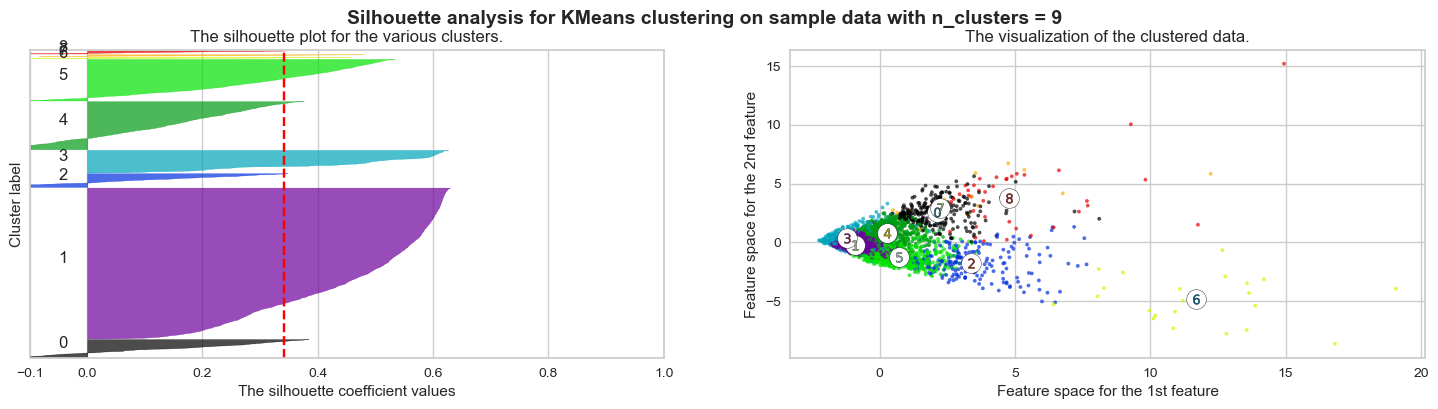

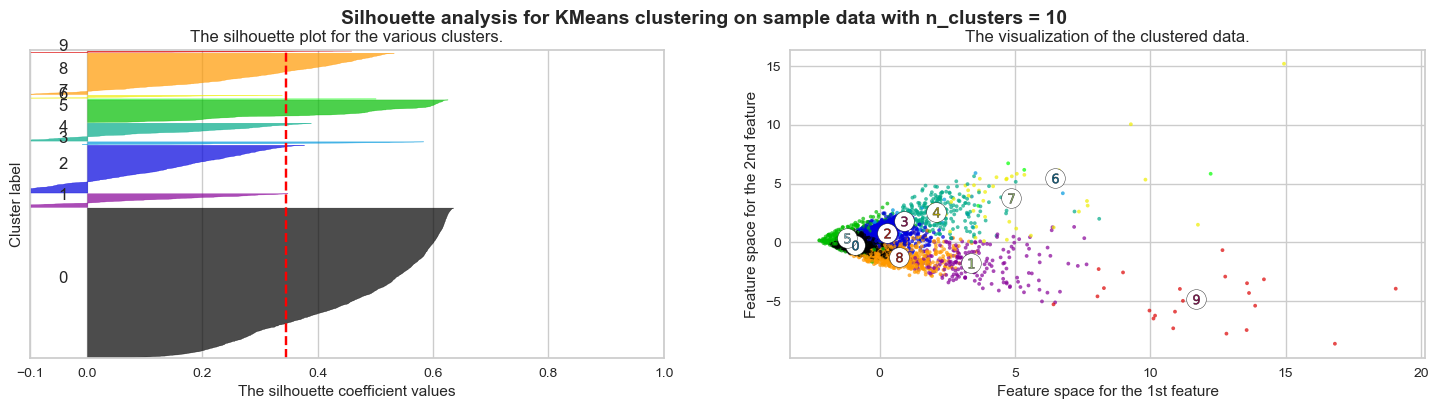

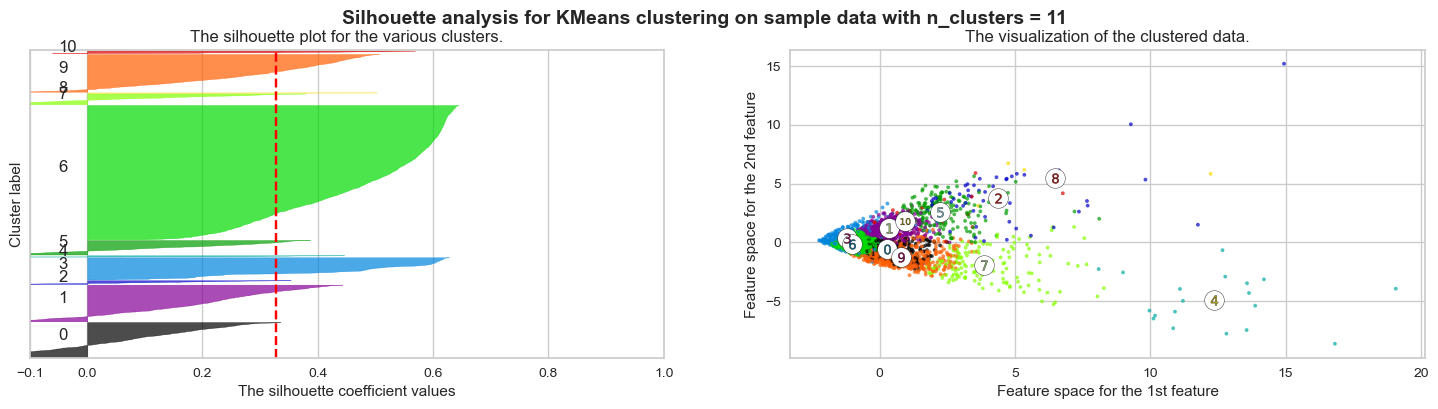

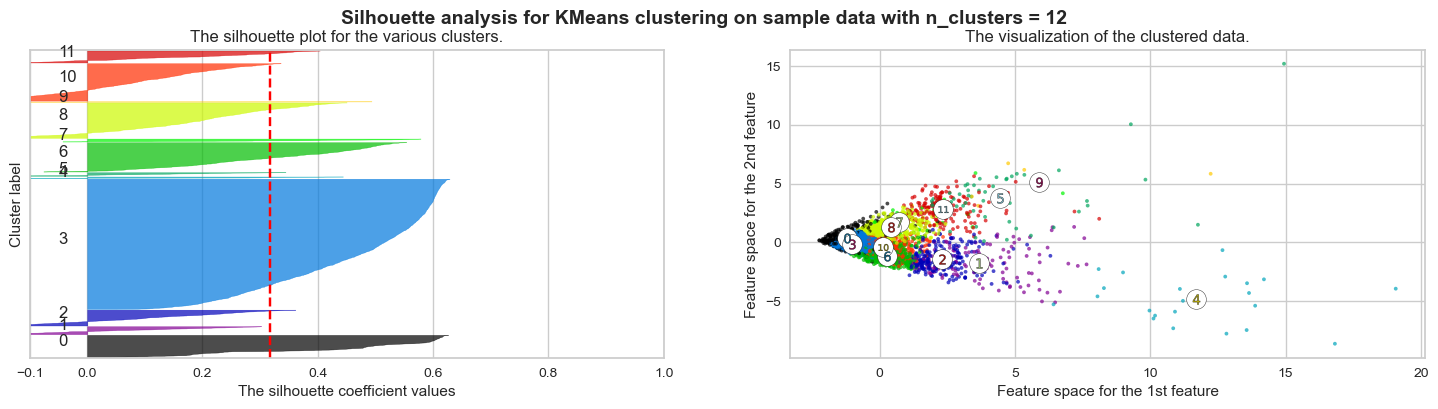

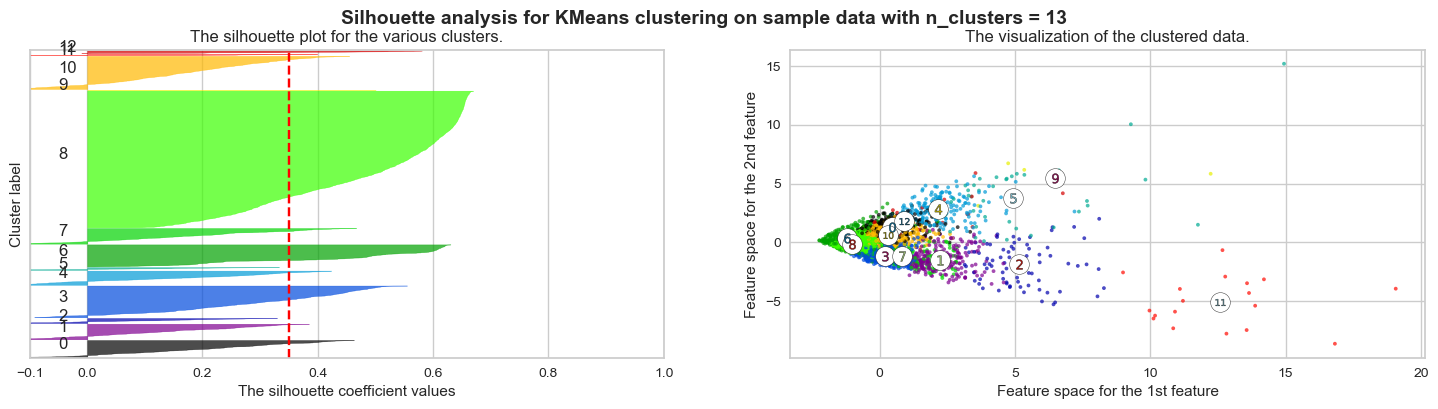

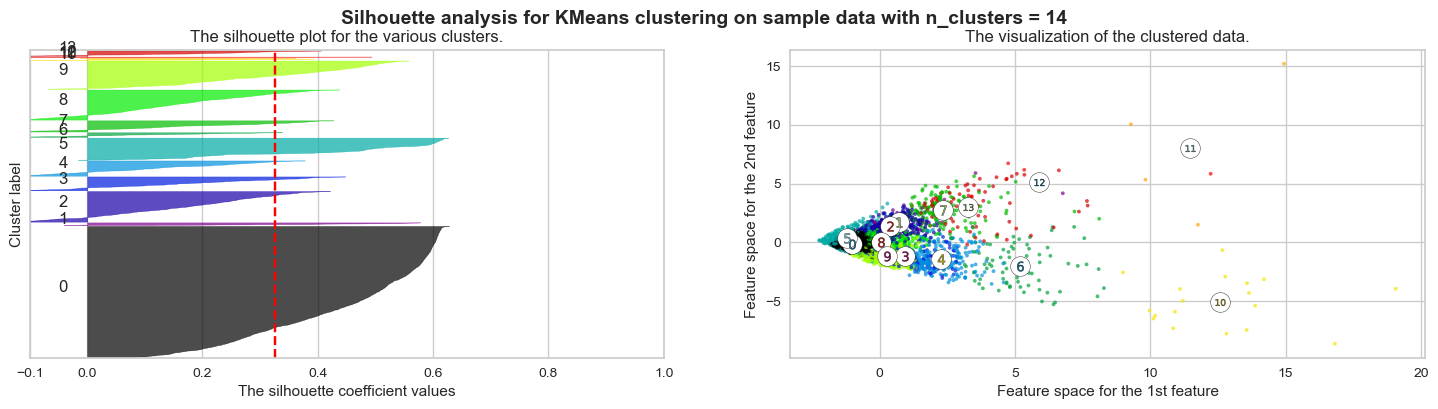

In [26]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), ds_pca, random_state)

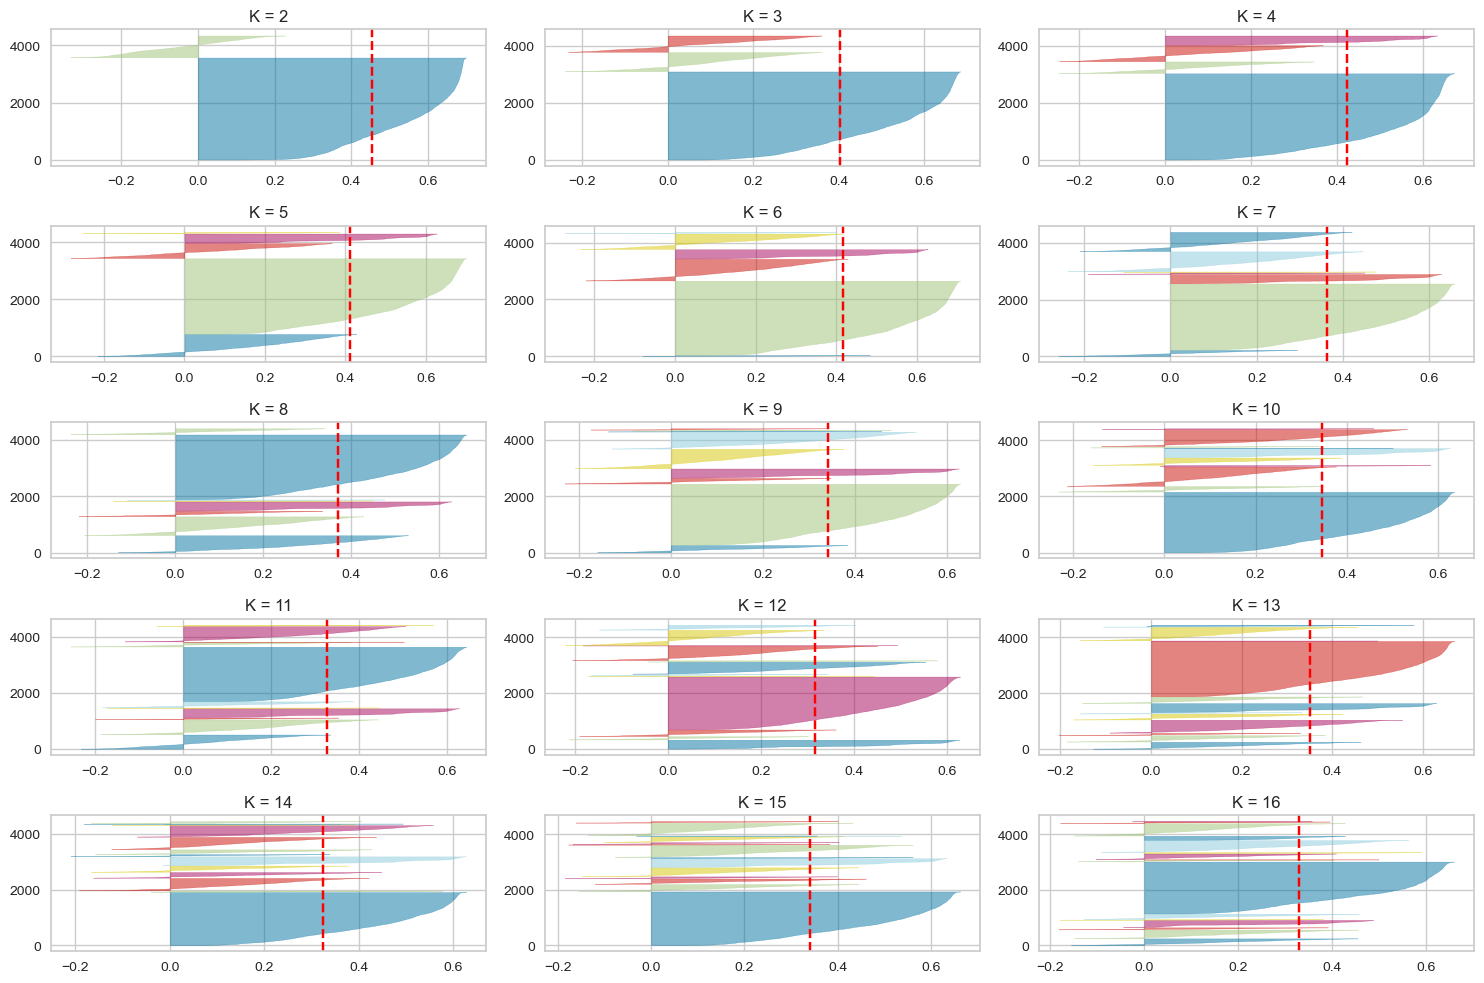

In [27]:
# Display the Silhouette Score and Plot Silhouette Plot
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(ds_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the graph, we can say that the best number of clusters is 6. Since the silhoutte score are nearing the number 1. Though the 2 cluster might seem better, but due to the silhoutte plot that shows data is evenly clustered. The 6 cluster would look better.

# F. Model Definition

1. PCA to reduce the dimension of the data by removing some of it's features. Based on the elbow method with 6 components the data retains 90% of its value.

2. KMeans is a machine learning algorithm by partitioning a dataset into a set number of clusters. We are reducing the pca to 6 components. By using the elbow method, we could see that on the 6 components there seems to be the start small decreasement compared to the ones before it. By the silhouette score the 2 components might seems to be the best choice, but with the silhoutte analysis the 6 components looks more ideal. It is more evenly distributed and the lines are reached.

# G. Model Trainning

In [28]:
# Train with optimal number of clusters
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(ds_pca)
pred

array([3, 3, 3, ..., 1, 1, 4], dtype=int32)

Each entries cluster will be predicted from 0 to 6.

In [29]:
# Insert clustering result into original dataset
ds['cluster'] = pred
ds

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,cluster
2,757.964752,157.4,0.0,0.000000,0.125000,1200.0,1494.480376,2638.598410,8,3
3,264.566591,1150.0,0.0,0.000000,0.125000,1200.0,3029.380326,85.428885,8,3
4,440.613643,600.0,0.0,0.000000,0.125000,1000.0,215.316424,137.846006,8,3
5,611.561026,765.0,0.0,0.000000,0.125000,2000.0,204.464151,146.352314,8,3
7,105.333584,306.0,0.0,0.000000,0.125000,6000.0,101.986927,118.324082,8,3
...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,0.0,0.0,4372.393835,0.000000,12000.0,2468.988022,2134.295731,11,4
4471,1040.030221,0.0,0.0,1390.648290,0.000000,1400.0,290.129620,287.994171,11,1
4472,1322.818587,0.0,0.0,762.301096,0.000000,1500.0,1035.627320,312.835530,11,1
4473,1060.391273,0.0,0.0,1475.858013,0.000000,2000.0,407.360560,277.084736,11,1


The prediction will be combined with the data for a better read.

<Axes: >

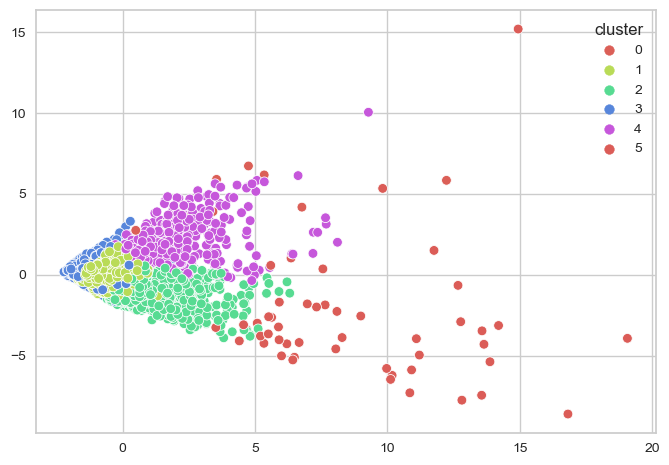

In [30]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=6)
pca_2d.fit(scaled_ds)

scaled_ds_pca_2d = pca_2d.fit_transform(scaled_ds)

sns.scatterplot(x=scaled_ds_pca_2d[:,0], y=scaled_ds_pca_2d[:,1], hue=ds['cluster'], palette='hls')

The plot shows 6 different clusters from the data collected, labelled 0 to 5. Cluster 4 and 5 is much more spread out meaning more variations. Clusters 0 to 3 overlaps indicating the boundaries aren't very distinct. Cluster 5 also isn't densely populated indicating as outliers.  

# H. Model Evaluation (EDA Cluster)

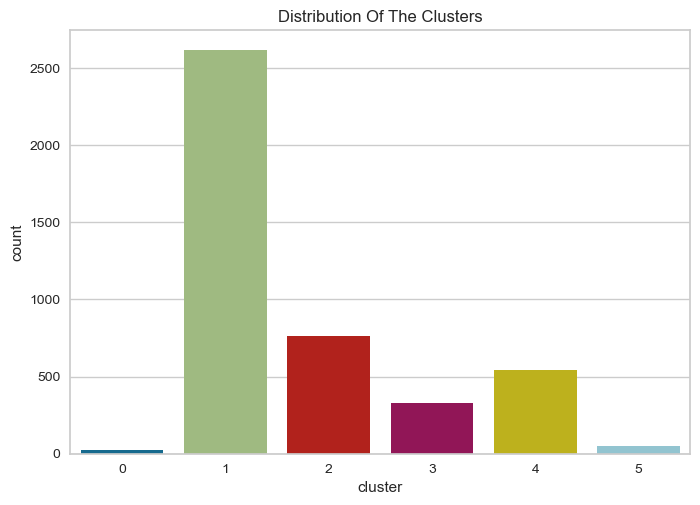

In [50]:
#Plotting countplot of clusters
pl = sns.countplot(x=ds["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

The graph doesn't seem to be evenly distributed. Significant portion of data are in cluster 1. Cluster 2 has the second-highest number of data points, followed by clusters 4 and 3. This imbalance data might affect the performance in identifying the clusters.


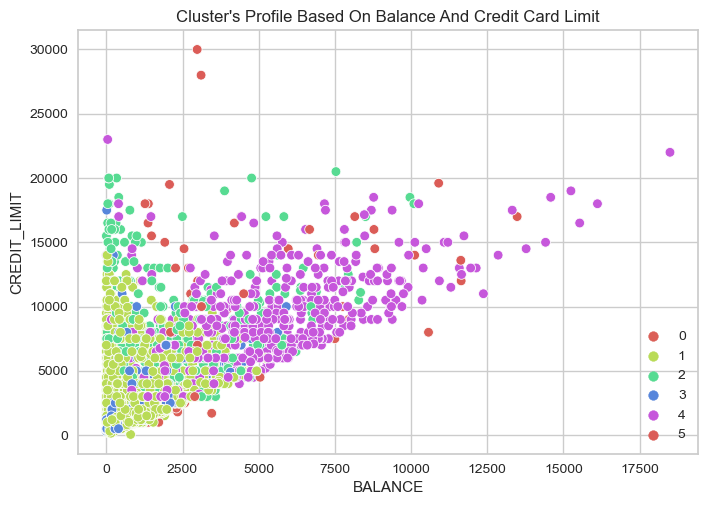

In [32]:
# Plot the clusters based on balance and credit limit
pl = sns.scatterplot(data = ds,x=ds['BALANCE'], y=ds['CREDIT_LIMIT'],hue=ds['cluster'], palette='hls')
pl.set_title("Cluster's Profile Based On Balance And Credit Card Limit")
plt.legend()
plt.show()

From the plot we could see clearly: 

    * Cluster 1 has a small credit card limit as well as small balance.

    * Cluster 2 has little to medium balance with slightly higher credit limit than cluster 1.

    * Cluster 4 has medium to high balance with medium to high credit limit also.

Therefore, we could say the higher the balance, the higher is the credit limit.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

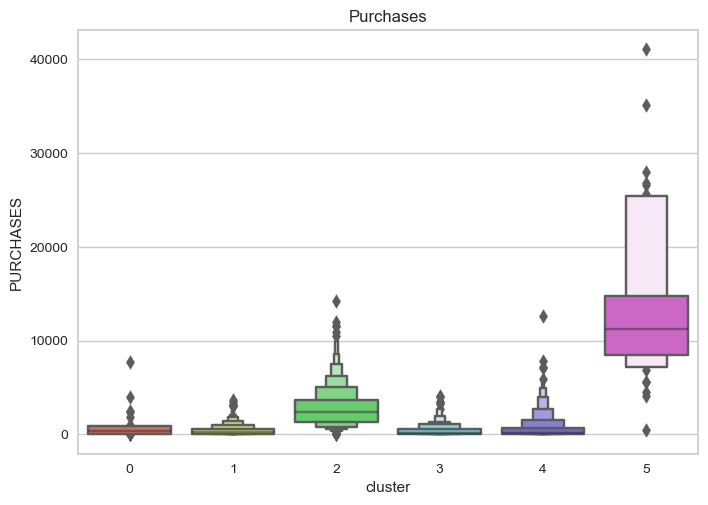

In [33]:
#Plotting the purchased
plt.figure()
pl=sns.boxenplot(y=ds["PURCHASES"],x=ds["cluster"], palette= 'hls')
pl.set_title("Purchases")
plt.show()

Based on the plot, cluster 5 has the most purchases, cluster 2 has the second most purchases, and cluster 0 has the least purchases. Cluster 4 has a decent amount of purchases. Meanwhile, cluster 1 and 3 has a similar amount of purchases. Cluster 5 and 2 are considered as frequent credit card spenders.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 96.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/li

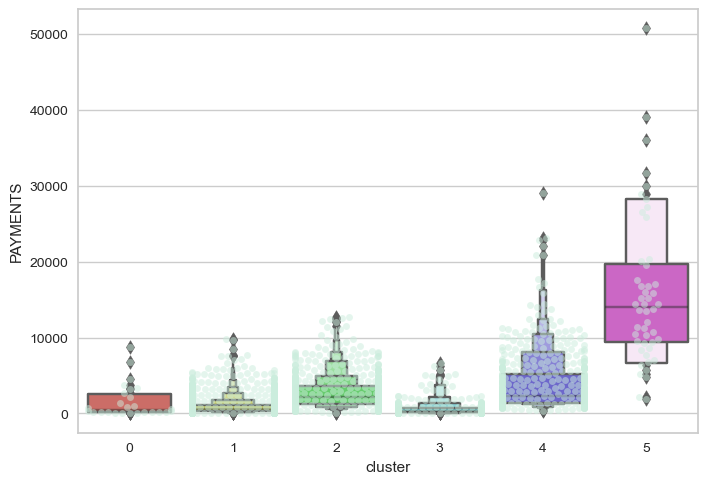

In [34]:
# Plot the clusters based on payments
plt.figure()
pl=sns.swarmplot(x=ds["cluster"], y=ds['PAYMENTS'], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=ds["cluster"], y=ds['PAYMENTS'], palette='hls')
plt.show()

Based on the plot, we could see that cluster 5 has the most payments, followed by cluster 4, and then cluster 2. Cluster 3 has the least payments. Cluster 5 who has a lot of purchases also pay quite a handsome amount of credit. Cluster 2 might have more purchases compared to cluster 4, but cluster 2 have a more pricey credit usage compared to cluster 4.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/l

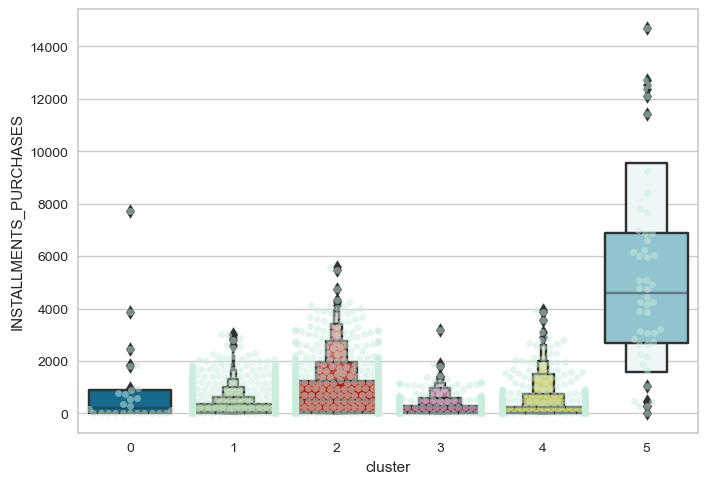

In [35]:
# Plot the clusters based on installment purchases
plt.figure()
pl=sns.swarmplot(x=ds["cluster"], y=ds['INSTALLMENTS_PURCHASES'], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=ds["cluster"], y=ds['INSTALLMENTS_PURCHASES'], palette='hls')
plt.show()

Based on this plot, cluster 5 has the highest installments purchases. Cluster 2 has the second highest installments purchase. Cluster 3 has the lowest installment purchases. Cluster 1 and 3 are somewhat similar. Cluster 0 has quite a low installment purchases, but a lot of impulses. Cluster 5 mainly pays in installments for their frequent and pricey purchases. Cluster 2 also pay with installments as their financial stretegy in using credit card. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 96.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/l

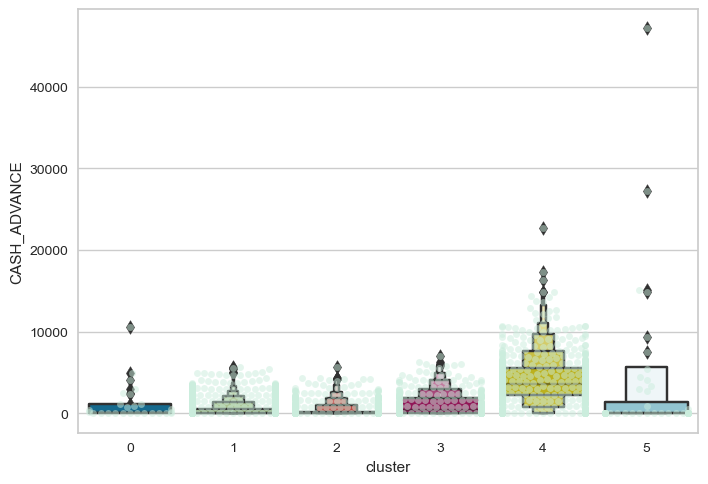

In [36]:
# Plot the clusters based on cash advance users
plt.figure()
pl=sns.swarmplot(x=ds["cluster"], y=ds['CASH_ADVANCE'], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=ds["cluster"], y=ds['CASH_ADVANCE'], palette='hls')
plt.show()

Based on the plot, cluster 4 are frequent cash advance users, their financial strategy might rely in cash advancement. Cluster 0 rarely to never use cash advances. Cluster 5 eithers avoid cash advancement or uses them not frequently like cluster 1, 2, and 3. Cluster 4 prefers cash in advance for their pricey purchases rather than installments. Cluster 0 doesn't seem to like paying their purchases in cash advancement, seems to like installments better. 

# I. Model Saving

In [ ]:
with open('df.txt', 'w') as file_1:
  json.dump(df, file_1)

with open('ds.txt', 'w') as file_2:
  json.dump(ds_pca, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('pca.pkl', 'wb') as file_4:
  pickle.dump(pca, file_4)

with open('km.pkl', 'wb') as file_5:
  pickle.dump(km, file_5)

In [ ]:
with open('df.txt', 'r') as file_1:
  df = json.load(file_1)

with open('ds.txt', 'r') as file_2:
  ds_pca = json.load(file_2)

with open("scaler.pkl", "rb") as file_3:
  scaler = pickle.load(file_3)

with open("pca.pkl", "rb") as file_4:
  pca = pickle.load(file_4)

with open("km.pkl", "rb") as file_5:
  km = pickle.load(file_5)

# J. Model Inference

In [71]:
# Create a DataFrame from the dummy data with new columns and values
data_dummy = {
    'CUST_ID': [2957, 5371, 2583, 5797, 3529, 2859, 7413, 1007, 4387, 8101, 8299, 8805, 2345, 6785, 7347, 8447, 1995],
    'BALANCE': [592.466798, 1073.370435, 19.548437, 39.670161, 27.694103, 2560.743960, 1184.529629, 29.602980, 665.786437, 1008.494418, 611.561026, 105.333584, 9629.808851, 1040.030221, 1322.818587, 1060.391273, 3447.674222],
    'BALANCE_FREQUENCY': [1.000000, 0.818182, 0.727273, 1.000000, 0.444444, 0.900000, 1.000000, 0.545455, 1.000000, 1.000000, 1.000, 0.375, 1.000, 1.000, 1.000, 1.000, 1.000],
    'PURCHASES': [5629.41, 824.77, 266.56, 319.92, 474.96, 110.25, 467.32, 144.94, 5634.56, 639.70, 765.0, 306.0, 0.0, 0.0, 0.0, 0.0, 205.0],
    'ONEOFF_PURCHASES': [0.00, 377.81, 84.00, 0.00, 0.00, 40.00, 0.00, 0.00, 3335.15, 0.00, 765.0, 306.0, 0.0, 0.0, 0.0, 0.0, 205.0],
    'INSTALLMENTS_PURCHASES': [6229.41, 446.96, 182.56, 319.92, 474.96, 70.25, 467.32, 144.94, 2299.41, 639.70, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'CASH_ADVANCE': [0.000000, 1214.495468, 0.000000, 0.000000, 0.000000, 3702.475695, 2337.837011, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 4372.393835, 1390.648290, 762.301096, 1475.858013, 4548.057776],
    'PURCHASES_FREQUENCY': [0.916667, 0.666667, 0.666667, 1.000000, 0.333333, 0.300000, 1.000000, 0.333333, 1.000000, 1.000000, 0.125, 0.125, 0.000000, 0.000000, 0.000000, 0.000000, 0.090909],
    'ONEOFF_PURCHASES_FREQUENCY': [0.000000, 0.416667, 0.083333, 0.000000, 0.000000, 0.100000, 0.000000, 0.000000, 1.000000, 0.000000, 0.125, 0.125, 0.000000, 0.000000, 0.000000, 0.000000, 0.090909],
    'PURCHASES_INSTALLMENTS_FREQUENCY': [1.000000, 0.500000, 0.583333, 1.000000, 0.222222, 0.200000, 1.000000, 0.250000, 1.000000, 1.000000, 0.0, 0.0, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'CASH_ADVANCE_FREQUENCY': [0.000000, 0.333333, 0.000000, 0.000000, 0.000000, 0.200000, 0.583333, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.545455, 0.545455, 0.545455, 0.545455, 0.545455],
    'CASH_ADVANCE_TRX': [0, 6, 0, 0, 0, 2, 7, 0, 0, 0, 0, 0, 9, 18, 11, 10, 7],
    'PURCHASES_TRX': [82, 25, 9, 12, 7, 4, 25, 7, 104, 32, 1, 2, 0, 0, 0, 0, 1],
    'CREDIT_LIMIT': [6000.0, 1800.0, 4500.0, 10000.0, 7500.0, 10000.0, 6500.0, 5000.0, 5200.0, 1000.0, 2000.0, 6000.0, 12000.0, 1400.0, 1500.0, 2000.0, 10500.0],
    'PAYMENTS': [5723.333315, 534.728641, 395.242487, 365.863745, 611.396021, 881.420580, 903.639776, 249.685121, 5831.664538, 862.819773, 204.464151, 101.986927, 2468.988022, 290.129620, 1035.627320, 407.360560, 665.239171],
    'MINIMUM_PAYMENTS': [187.963174, 892.117717, 199.880942, 176.935616, 81.113509, 724.699558, 340.000899, 88.988794, 202.213224, 1027.530687, 146.352314, 118.324082, 2134.295731, 287.994171, 312.835530, 277.084736, 817.844662],
    'PRC_FULL_PAYMENT': [0.833333, 0.000000, 0.857143, 0.727273, 1.000000, 0.000000, 0.083333, 0.181818, 0.916667, 0.000000, 0.0, 0.0, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'TENURE': [12, 12, 12, 12, 9, 10, 12, 12, 12, 12, 8, 8, 11, 11, 11, 11, 11]
}

data_dummy = pd.DataFrame(data_dummy)
data_dummy

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2957,592.466798,1.000000,5629.41,0.00,6229.41,0.000000,0.916667,0.000000,1.000000,0.000000,0,82,6000.0,5723.333315,187.963174,0.833333,12
1,5371,1073.370435,0.818182,824.77,377.81,446.96,1214.495468,0.666667,0.416667,0.500000,0.333333,6,25,1800.0,534.728641,892.117717,0.000000,12
2,2583,19.548437,0.727273,266.56,84.00,182.56,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,4500.0,395.242487,199.880942,0.857143,12
3,5797,39.670161,1.000000,319.92,0.00,319.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,10000.0,365.863745,176.935616,0.727273,12
4,3529,27.694103,0.444444,474.96,0.00,474.96,0.000000,0.333333,0.000000,0.222222,0.000000,0,7,7500.0,611.396021,81.113509,1.000000,9
5,2859,2560.743960,0.900000,110.25,40.00,70.25,3702.475695,0.300000,0.100000,0.200000,0.200000,2,4,10000.0,881.420580,724.699558,0.000000,10
6,7413,1184.529629,1.000000,467.32,0.00,467.32,2337.837011,1.000000,0.000000,1.000000,0.583333,7,25,6500.0,903.639776,340.000899,0.083333,12
7,1007,29.602980,0.545455,144.94,0.00,144.94,0.000000,0.333333,0.000000,0.250000,0.000000,0,7,5000.0,249.685121,88.988794,0.181818,12
8,4387,665.786437,1.000000,5634.56,3335.15,2299.41,0.000000,1.000000,1.000000,1.000000,0.000000,0,104,5200.0,5831.664538,202.213224,0.916667,12
9,8101,1008.494418,1.000000,639.70,0.00,639.70,0.000000,1.000000,0.000000,1.000000,0.000000,0,32,1000.0,862.819773,1027.530687,0.000000,12


Data dummy are made into data frame to test the model.

In [73]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT']
data_dummy_picked = data_dummy.drop(cols_del, axis=1)

Then we are going to pick the columns that are going to be used.

In [84]:
# Scaling and feature selection
data_dummy_scaled = scaler.fit_transform(data_dummy_picked)
data_dummy_pca = pca.fit_transform(data_dummy_scaled)

# Final inference data
data_inference_final = pd.DataFrame(data_dummy_pca)

The data will be scaled and feature selected to make the final inference data that later will be predicted.

In [83]:
# Predictinference
pred = km.predict(data_inference_final)

# Show prediction results
print("Cluster Predictions:")
print(pred)

Cluster Predictions:
[4 1 2 2 2 1 1 2 4 1 2 2 1 1 1 1 1]


These are the prediction for the data inference.

# K. Conclusion

### Conceptual Problems

Inertia in K-Means is a clustering algorithm to measure how well the data points are clustered around the centroids.

The elbow method is a method that determine the number of clusters in a dataset for K-Means. It's mainly used to find balance, avoiding overfitting and underfitting the data. To use it, simply choose a range of k (clusters), make sure its a reasonable amount. K-means algorithm are then applied for each k value and compute the inertia. Then, plot the number of clusters on the x-axis and the corresponding inertia on the y-axis. Lastly, you will identify the point in a bend in the plot that decreases lightly. The advantages of elbow method are its simplicity in understanding and implementation, visualization for identifying an optimal number of clusters, and is effective for a clear data. Though, it's quite subjective, meaning everyone can have different opinions, the computation might k-means for a large range of 
k can be expensive, assumptions for decreasement of inertia might not always be the case, and there's no guarantee for the optimal clusters.

### Conclusion

To find the segmentations of credit card customers, first you will have to understand the data and clean it well. From knowing the types of data, cleaning the empty values data, find out how spread out of the data are, handling the outliers, feature select and using the clustering model well. 

The data that is used have 18 columns with 4475 entries and 155 empty values. The credit card limit ranges from 0 to 20000, peaking at 2500. Mainly credit card customers pays in 12 months tenures. The balance of the customers ranges from 0 to 17500 and peaking at a little over 0.

After the erasing the empty datas, there are still alot of information that will be valuable for the model to read. As all of the data are numerical with encoded categorical values, the skewness will be checked for dealing with the outliers. There are different methods to be used based on the skewness od the columns. Though after handling the outlier, there doesn't seem to be a lot differences with the data before outlier handling.

Based on the graph and plots that are shown, some of the clusters are very visible and easy to read. Though some of the graphs are hard to read and/or some are quite similar to one another. Which means the number of clusters may have been too much or less ideal. Nevetheless, the elbow and silhoutte shows that it seems to be quite ideal. 

The advantages of the K-means models in this case are that it scales well for data that has large number of samples, it loads fast (important for big datas), and can be interpreted easily. The disadvantages are that it need to manually search for number of clusters. Which means that the number of clusters that we put may or may not have been accurate. It's initial to centroid points are quite sensitive, with different placement, the outcomes might be different. It's also outlier sensitive, which means that the final placement of centroid can be affected by the outliers. 

To improve the model, it needs another model to check for a more accurate clustering. For example using DBSCAN might help to check for the ideal number of clusters. Maybe the pca or the dimensionality reduction number is also not that compatible with the data.

There are 6 clusters that we get from our model with different characteristics. The data mainly grouped in cluster 1. This imbalance data might affect the performance in identifying the clusters.

Based on the elbow method, 6 clusters are ideal for the customers segmentation. Due to the decrease difference in in the distance between each point and the centroid in a cluster. This decision also strengthen by the silhoutte score that  Silhoutte score are nearing the number 1, along with the silhoutte plot that shows evenly clustered data. The 6 cluster would look better.

Cluster 1 has a small balance with small credit card limit. Cluster 2 has lower medium balance with a medium credit card limit. Cluster 4 has a higher medium balance with a higher medium credit card limit. In summary, the higher the balance, the higher its credit limit and vice versa.

Cluster 5 have the most purchases, followed by cluster 2, and cluster 0 has the least purchases. Cluster 4 have a decent amount of purchases. Cluster 1 and 3 has a similar amount of purchases.

As cluster 5 has the most purchases, cluster 5 also has the most payments. Cluster 4 also pays a good amount of payments. Cluster 2 also pays decently. Meanwhile cluster 3 pays the least amount. Cluster 2 might have more purchases compared to cluster 4, but cluster 2 have a more pricey credit usage compared to cluster 4.

Cluster 5 often purchase in installement. Cluster 2 is quite often at purchasing in installments. Cluster 4 is somewhat often at purchasing in installments. Cluster 1 and 3 are quite similar in ways of purchasing installments. Most in cluster 0 doesn't purchase installments quite often. 

Cluster 4 frequently pays cash in advance, unlike cluster 0 who rarely pays in advance. Cluster 5 doesn't seem to either pay cash in advance or avoid it. Meanwhile cluster 1, 2, and 3 doesn't pay cash in advance frequently. 

Clusters:

    - 0: 
        * Least purchase
        * Don't really like to purchase in installments
        * Rarely pays in advance
        * Small in numbers

    - 1:
        * Most customer in this data
        * Small card limit and balance
        * Quite small purchases
        * Quite small installment purchases
        * Doesn't pay cash in advance frequently
    - 2:
        * Second largest part of data
        * Low medium balance with low medium card limit
        * Second most purchases
        * Decent amount of payments
        * Purchase installments quite often
    - 3:
        * Fourth largest part of data 
        * Small amount of purchases
        * Small payments 
        * Quite small installment purchases
        * Doesn't pay cash in advance frequently
    - 4:
        * Third largest part of data
        * High medium balance with a high medium credit card limit
        * Decent amount of purchases
        * Pays a good amount of payments
        * Somewhat often at purchasing in installments
        * Cluster 4 frequently pays cash in advance
    - 5:
        * Small part of data
        * Purchase a lot
        * Have lots of payments
        * Often purchase in installment
        * An ok amount of cash advancement

Cluster 0 doen't seem to like using credit cards. Majority of customers are cluster 1, seems to use credit card frugally. Cluster 2 seems quite lavish. Cluster 3 seems trying to limit use credit card. Cluster 4 are customers that seems knowledgable in using credit cards. Cluster 5 seems to be the most lavish customers to use credit card. Cluster 4 prefers cash in advance for their pricey purchases rather than installments. Cluster 0 doesn't seem to like paying their purchases in cash advancement, seems to like installments better.

### Recommendations

For customers on cluster 0, we can offer an introductory  rewards or cash backs  on the initial purchases to encourage card usage. Since based on what we see they hardly use credit cards, we can assume that they don't really understand the credit card benefits, that’s why we could provide education campaigns for product benefits, information, and safety in using credit cards. Other than that, we could give them free annual fee to reduce usage barriers.

For customers on cluster 1, we could increase their credit card limit gradually to encourage more usage.  We could also provide targeted promotions with small, manageable rewards for them. Educational contents like tips on maximizing credit card benefits for them are also useful. 

For customers on cluster 2, we could offer rewards programs that match their spending habits like higher points for specific categories. We can also give them access to exclusive deals and experiences. Loyalty program rewards for frequent and larger purchases can also be beneficial.

For customer on cluster 3, offer tools and resources to help manage spending and budgeting. Low-interest rates to reduce the cost of occasional purchases might be suitable for them. Lastly, promote responsible credit use through educational materials might give improvement in their purchases.

For customers on cluster 4, offer premium services such as concierge, travel insurance, and extended warranties. Other than that, we could provide flexible payment options, installment plans with low-interest rates. Invite them to exclusive events and provide personalized experiences can make their credit card usage more enjoyable.

For customers on cluster 5, develop high-end rewards programs with luxury benefits such as travel, fine dining, and exclusive experiences. A personalized service and support by assigning dedicated account managers can induce more credit card usage by them. Lastly, offering exclusive access to premium events and products would be suitable for this cluster of customers.
